In [ ]:
!pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 10.1 MB/s eta 0:00:00


In [ ]:
import random
import pandas as pd
from faker import Faker

fake = Faker()

# Generate data for 1000 patients
data = []
for _ in range(1000):
    name = fake.name()
    age = random.randint(1, 90) if random.random() < 0.95 else None  # Introduce missing values in age
    if age is not None:
        if age <= 18:
            age_group = 'Child' if age <= 12 else 'Teenager'
        else:
            age_group = 'Adult'
    else:
        age_group = 'Unknown'

    gender = random.choice(['Male', 'Female'])
    race = random.choice(['Asian', 'Black', 'Hispanic', 'White', 'Other'])
    blood_group = random.choice(['A+', 'A-', 'B+', 'B-', 'AB+', 'AB-', 'O+', 'O-'])
    temperature = round(random.uniform(97.0, 99.0), 1)
    blood_pressure_sys = random.randint(90, 180)  # Allow for outliers
    blood_pressure_dia = random.randint(60, 120)  # Allow for outliers
    height = round(random.uniform(120, 200), 2)  # in centimeters
    weight = round(random.uniform(40, 150), 2)   # in kilograms

    # Simulate common health concerns based on age and gender
    common_health_concerns = []
    if age_group == 'Child':
        common_health_concerns.append('Vaccination')
        common_health_concerns.append('Growth and development')
    elif age_group == 'Teenager':
        common_health_concerns.append('Acne and skin issues')
        common_health_concerns.append('Mental health challenges')
        common_health_concerns.append('Sexual health education')
    elif age_group == 'Adult':
        common_health_concerns.append('Chronic diseases management')
        common_health_concerns.append('Heart health monitoring')
        common_health_concerns.append('Diet and exercise counseling')

    # Simulate additional health concerns
    additional_health_concerns = [fake.random.choice(['Asthma', 'Diabetes', 'Hypertension', 'Obesity', 'Allergies', 'Anxiety', 'Depression']) for _ in range(random.randint(0, 3))]

    # Combine common and additional health concerns
    health_concerns = common_health_concerns + additional_health_concerns

    # Determine if the patient needs medical attention based on health concerns and vital signs
    if any(condition in health_concerns for condition in ['Hypertension', 'Diabetes', 'Asthma', 'Allergies', 'Depression']):
        needs_medical_attention = 1
    elif blood_pressure_sys > 140 or blood_pressure_dia > 90 or weight > 100:
        needs_medical_attention = 1
    else:
        needs_medical_attention = 0

    # Simulate patients visiting for general checkups
    if random.random() < 0.2:  # 20% chance of visiting for a general checkup
        health_concerns = 'General Checkup'
        needs_medical_attention = 0

    data.append({
        'Name': name,
        'Age': age,
        'Age Group': age_group,
        'Gender': gender,
        'Race': race,
        'Blood Group': blood_group,
        'Temperature': temperature,
        'Blood Pressure (Systolic)': blood_pressure_sys,
        'Blood Pressure (Diastolic)': blood_pressure_dia,
        'Height': height,
        'Weight': weight,
        'Health Concerns': ', '.join(health_concerns) if not isinstance(health_concerns, str) else health_concerns,  # Convert list to string if not already
        'Needs Medical Attention': needs_medical_attention
    })

# Create a DataFrame
df = pd.DataFrame(data)

# Save the dataset to a CSV file
df.to_csv('medical_data_v3.csv', index=False)


ModuleNotFoundError: No module named 'faker'

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
%cd Healthcare/

/content/drive/MyDrive/Healthcare


In [10]:
%ls


HealthcareDataset.ipynb  medical_data_v2.csv  newmedical_data.csv
medical_data.csv         medical_data_v3.csv


In [11]:
import pandas as pd

# Assuming your dataset is stored in a CSV file named 'medical_data.csv'
# Replace 'medical_data.csv' with the actual file path if it's located in a different directory
file_path = 'medical_data_v3.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
print("First few rows of the dataset:")
print(df.head())


First few rows of the dataset:
                 Name   Age Age Group  Gender      Race Blood Group  \
0          Kevin Wong  29.0     Adult  Female     Black         AB+   
1    Mr. David Meyers  84.0     Adult    Male     White          A-   
2  Robert Sanchez DDS  26.0     Adult    Male  Hispanic          A+   
3         Brent Moore  42.0     Adult    Male     Black          B+   
4      Alicia Kennedy  24.0     Adult    Male     Black          A+   

   Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  Height  \
0         97.9                        178                          84  183.19   
1         98.1                        130                          88  170.96   
2         97.9                        121                         101  146.33   
3         98.1                        169                         112  197.98   
4         98.0                        100                          61  149.24   

   Weight                                    Health Con

In [19]:
df

Name   Age Age Group  Gender      Race Blood Group  \
0            Kevin Wong  29.0     Adult  Female     Black         AB+   
1      Mr. David Meyers  84.0     Adult    Male     White          A-   
2    Robert Sanchez DDS  26.0     Adult    Male  Hispanic          A+   
3           Brent Moore  42.0     Adult    Male     Black          B+   
4        Alicia Kennedy  24.0     Adult    Male     Black          A+   
..                  ...   ...       ...     ...       ...         ...   
995      Stacy Gallegos  36.0     Adult  Female     Black          A+   
996      Natalie Curtis  15.0  Teenager  Female     Asian         AB+   
997        Taylor Meyer  21.0     Adult    Male  Hispanic          A+   
998        Erin Morales  89.0     Adult    Male  Hispanic          A+   
999         Gary Harper   1.0     Child    Male     Asian          B+   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  Chronic diseases management, Heart health moni...   
1    170.96   92.36  Chronic diseases management, Heart health moni...   
2    146.33   77.41  Chronic diseases management, Heart health moni...   
3    197.98  113.40  Chronic diseases management, Heart health moni...   
4    149.24   79.90  Chronic diseases management, Heart health moni...   
..      ...     ...                                                ...   
995  162.34  136.16  Chronic diseases management, Heart health moni...   
996  182.38   55.07  Acne and skin issues, Mental health challenges...   
997  185.71  117.14                                    General Checkup   
998  144.21  109.79                                    General Checkup   
999  194.56   77.49                                    General Checkup   

     Needs Medical Attention  
0                          1  
1                          1  
2                          1  
3                          1  
4                          1  
..                       ...  
995                        1  
996                        0  
997                        0  
998                        0  
999                        0  

[1000 rows x 13 columns]

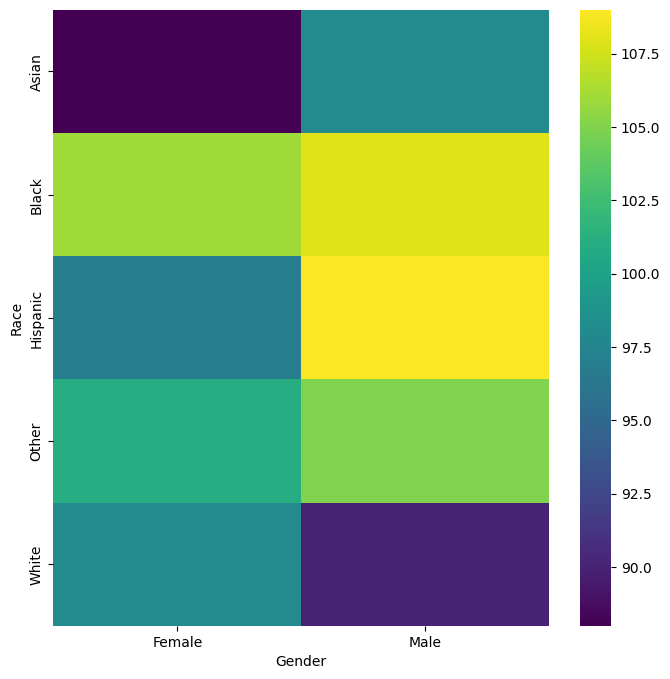

In [13]:
# @title Gender vs Race

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Race'].value_counts()
    for x_label, grp in df.groupby('Gender')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Gender')
_ = plt.ylabel('Race')

In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                 Age  Temperature  Blood Pressure (Systolic)  \
Age                         1.000000    -0.043379                  -0.009473   
Temperature                -0.043379     1.000000                   0.019296   
Blood Pressure (Systolic)  -0.009473     0.019296                   1.000000   
Blood Pressure (Diastolic)  0.010951    -0.012202                   0.016760   
Height                      0.034407     0.029523                   0.042426   
Weight                     -0.064587    -0.015252                   0.063763   
Needs Medical Attention     0.016633    -0.031977                   0.110760   

                            Blood Pressure (Diastolic)    Height    Weight  \
Age                                           0.010951  0.034407 -0.064587   
Temperature                                  -0.012202  0.029523 -0.015252   
Blood Pressure (Systolic)                     0.016760  0.042426  0.063763   
Blood Pressure (Diastolic) 

<ipython-input-23-22ae92833871>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


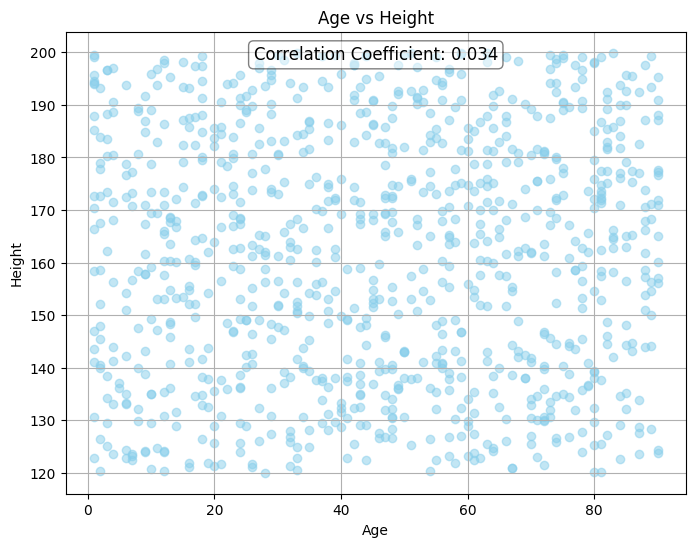

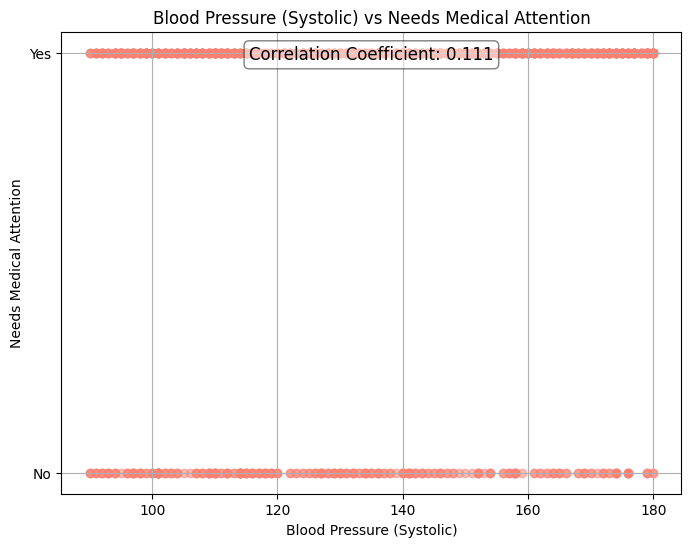

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Age vs Height
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['Height'], color='skyblue', alpha=0.5)
plt.title('Age vs Height')
plt.xlabel('Age')
plt.ylabel('Height')
plt.grid(True)

# Add correlation coefficient as annotation
corr_coeff = 0.034
plt.annotate(f'Correlation Coefficient: {corr_coeff:.3f}',
             xy=(0.5, 0.95), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()

# Scatter plot for Blood Pressure (Systolic) vs Needs Medical Attention
plt.figure(figsize=(8, 6))
plt.scatter(df['Blood Pressure (Systolic)'], df['Needs Medical Attention'], color='salmon', alpha=0.5)
plt.title('Blood Pressure (Systolic) vs Needs Medical Attention')
plt.xlabel('Blood Pressure (Systolic)')
plt.ylabel('Needs Medical Attention')
plt.yticks([0, 1], ['No', 'Yes'])
plt.grid(True)

# Add correlation coefficient as annotation
corr_coeff = 0.111
plt.annotate(f'Correlation Coefficient: {corr_coeff:.3f}',
             xy=(0.5, 0.95), xycoords='axes fraction',
             fontsize=12, ha='center', va='center',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.show()


<ipython-input-24-8b374aa8af03>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


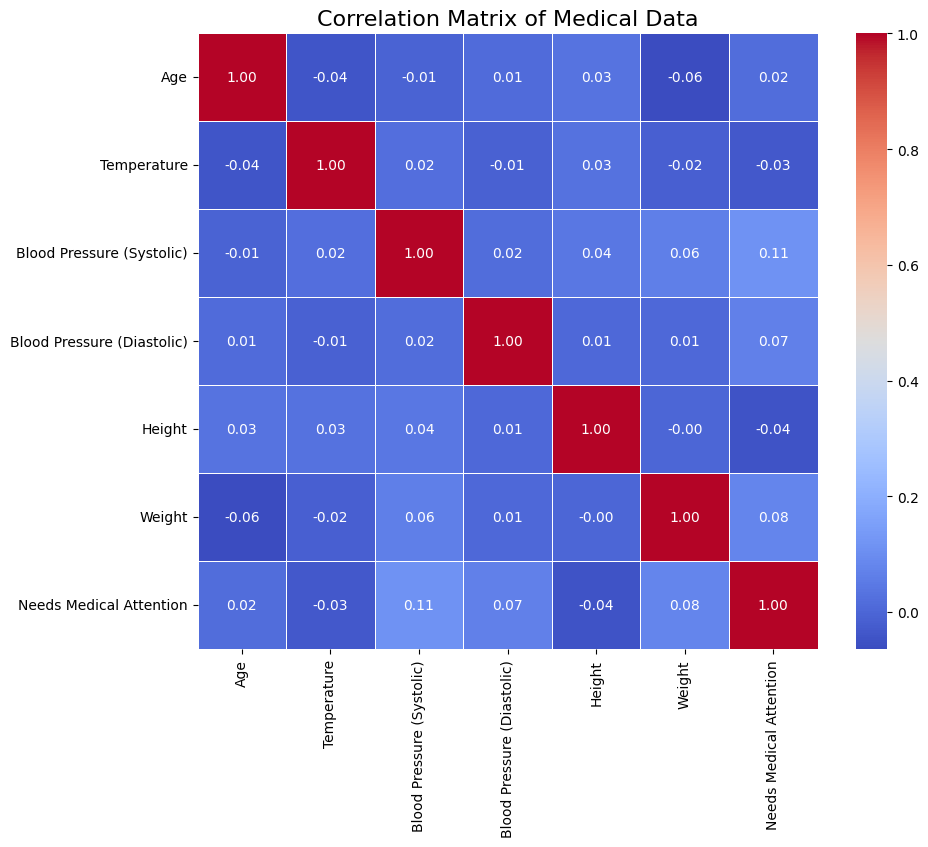

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title and rotate y-axis labels
plt.title('Correlation Matrix of Medical Data', fontsize=16)
plt.yticks(rotation=0)
plt.xticks(rotation=90)

# Display the heatmap
plt.show()


In [16]:
# Assuming df is DataFrame
column_datatypes = df.dtypes
print(column_datatypes)

Name                           object
Age                           float64
Age Group                      object
Gender                         object
Race                           object
Blood Group                    object
Temperature                   float64
Blood Pressure (Systolic)       int64
Blood Pressure (Diastolic)      int64
Height                        float64
Weight                        float64
Health Concerns                object
Needs Medical Attention         int64
dtype: object


In [17]:
quantitative_continuous = []  # List to store names of columns with continuous quantitative data
quantitative_discrete = []    # List to store names of columns with discrete quantitative data
qualitative_nominal = []      # List to store names of columns with nominal qualitative data
qualitative_ordinal = []      # List to store names of columns with ordinal qualitative data

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the data type is numerical
        if df[column].nunique() > 10:  # Arbitrary threshold to differentiate between continuous and discrete
            quantitative_continuous.append(column)
        else:
            quantitative_discrete.append(column)
    else:
        if df[column].nunique() > 10:  # Arbitrary threshold to differentiate between nominal and ordinal
            qualitative_nominal.append(column)
        else:
            qualitative_ordinal.append(column)

print("Quantitative Continuous:", quantitative_continuous)
print("Quantitative Discrete:", quantitative_discrete)
print("Qualitative Nominal:", qualitative_nominal)
print("Qualitative Ordinal:", qualitative_ordinal)

Quantitative Continuous: ['Age', 'Temperature', 'Blood Pressure (Systolic)', 'Blood Pressure (Diastolic)', 'Height', 'Weight']
Quantitative Discrete: ['Needs Medical Attention']
Qualitative Nominal: ['Name', 'Health Concerns']
Qualitative Ordinal: ['Age Group', 'Gender', 'Race', 'Blood Group']


In [14]:
import pandas as pd

breakdown_data = {
    'Column': ['Name', 'Age', 'Age Group', 'Gender', 'Race', 'Blood Group', 'Temperature', 'Blood Pressure (Systolic)',
               'Blood Pressure (Diastolic)', 'Height', 'Weight', 'Health Concerns', 'Needs Medical Attention'],
    'Data Type': ['Nominal', 'Quantitative, Discrete', 'Nominal', 'Nominal', 'Nominal', 'Nominal', 'Continuous', 'Continuous',
                  'Continuous', 'Continuous', 'Continuous', 'Nominal', 'Binary']
}

breakdown_df = pd.DataFrame(breakdown_data)

# Display the breakdown DataFrame
print("Breakdown of Dataset:")
print(breakdown_df)


Breakdown of Dataset:
                        Column               Data Type
0                         Name                 Nominal
1                          Age  Quantitative, Discrete
2                    Age Group                 Nominal
3                       Gender                 Nominal
4                         Race                 Nominal
5                  Blood Group                 Nominal
6                  Temperature              Continuous
7    Blood Pressure (Systolic)              Continuous
8   Blood Pressure (Diastolic)              Continuous
9                       Height              Continuous
10                      Weight              Continuous
11             Health Concerns                 Nominal
12     Needs Medical Attention                  Binary


In [20]:
print (df)

                   Name   Age Age Group  Gender      Race Blood Group  \
0            Kevin Wong  29.0     Adult  Female     Black         AB+   
1      Mr. David Meyers  84.0     Adult    Male     White          A-   
2    Robert Sanchez DDS  26.0     Adult    Male  Hispanic          A+   
3           Brent Moore  42.0     Adult    Male     Black          B+   
4        Alicia Kennedy  24.0     Adult    Male     Black          A+   
..                  ...   ...       ...     ...       ...         ...   
995      Stacy Gallegos  36.0     Adult  Female     Black          A+   
996      Natalie Curtis  15.0  Teenager  Female     Asian         AB+   
997        Taylor Meyer  21.0     Adult    Male  Hispanic          A+   
998        Erin Morales  89.0     Adult    Male  Hispanic          A+   
999         Gary Harper   1.0     Child    Male     Asian          B+   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178     

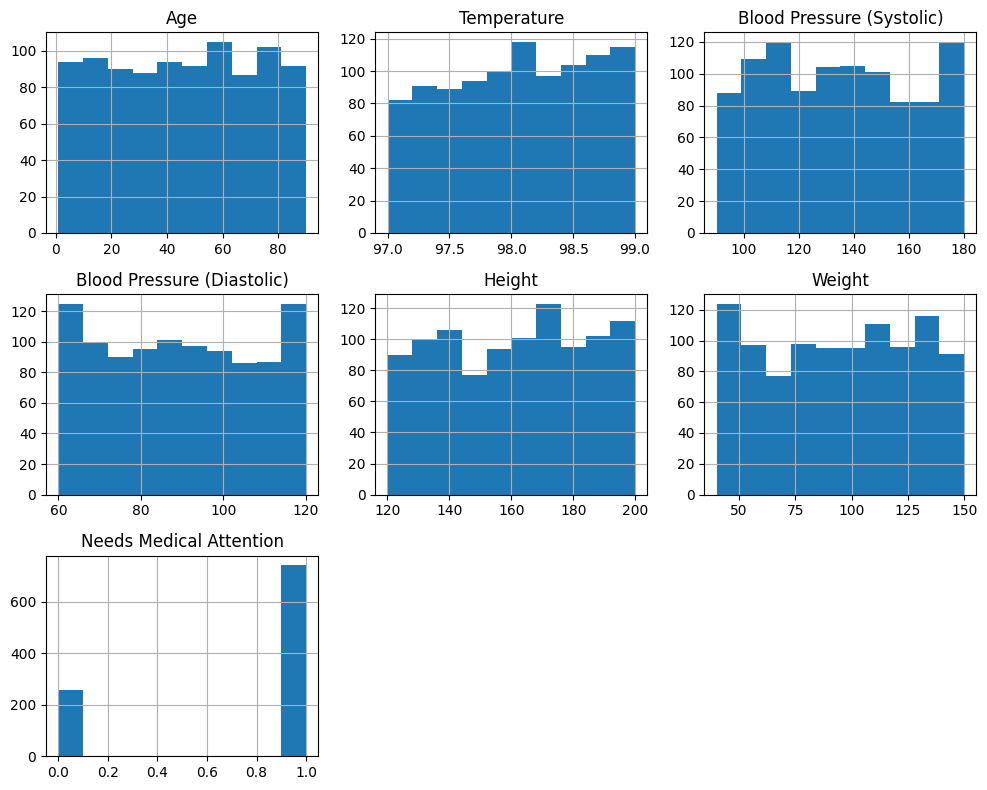

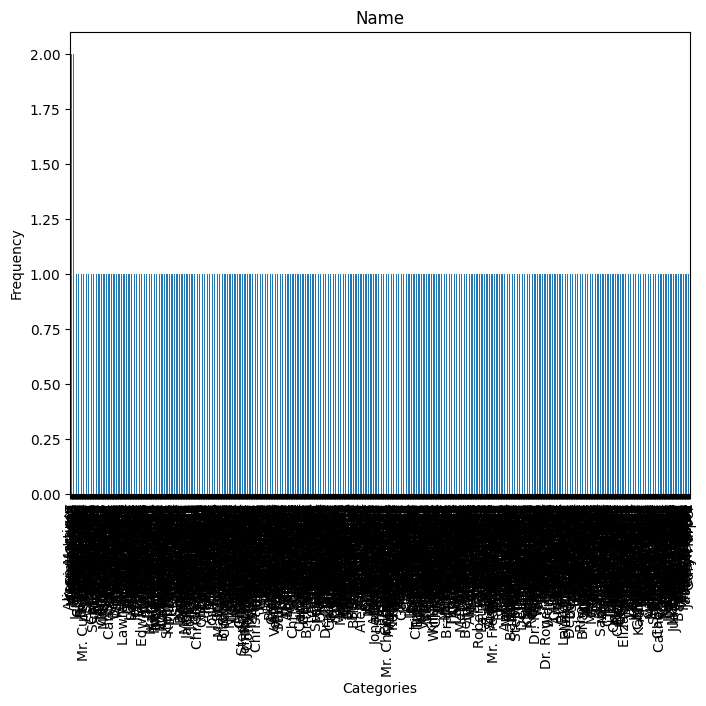

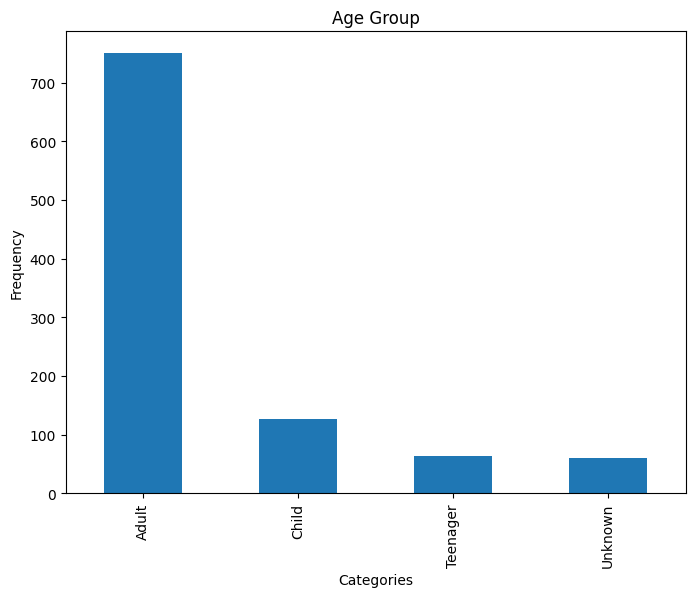

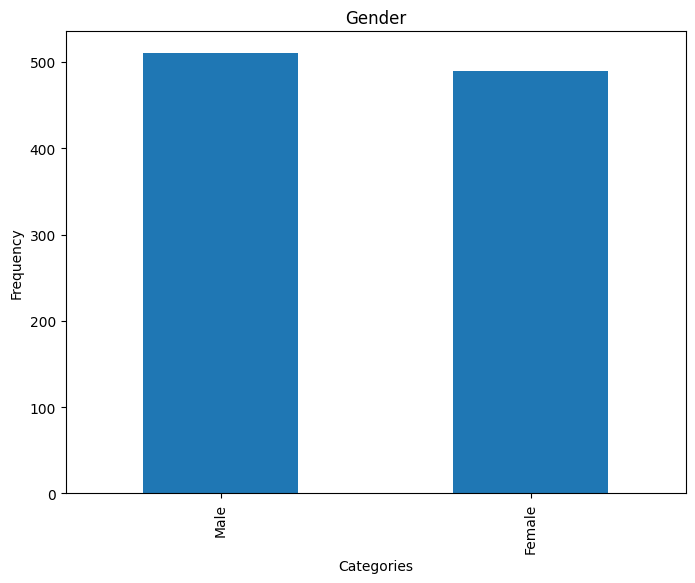

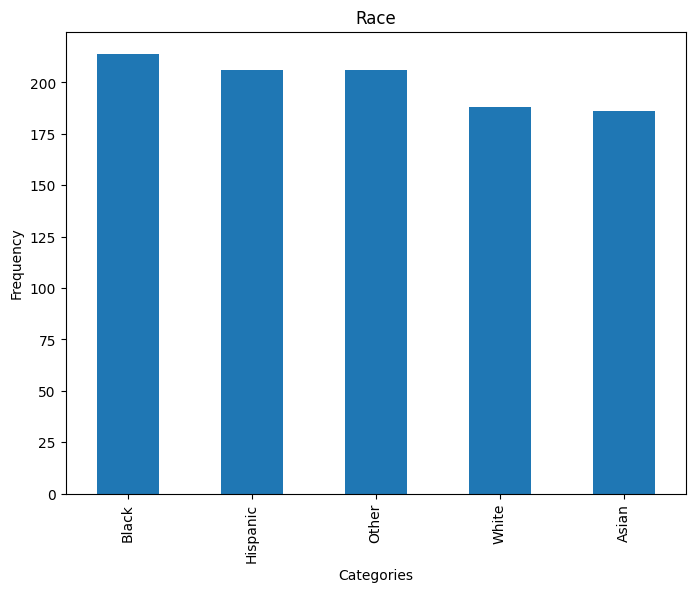

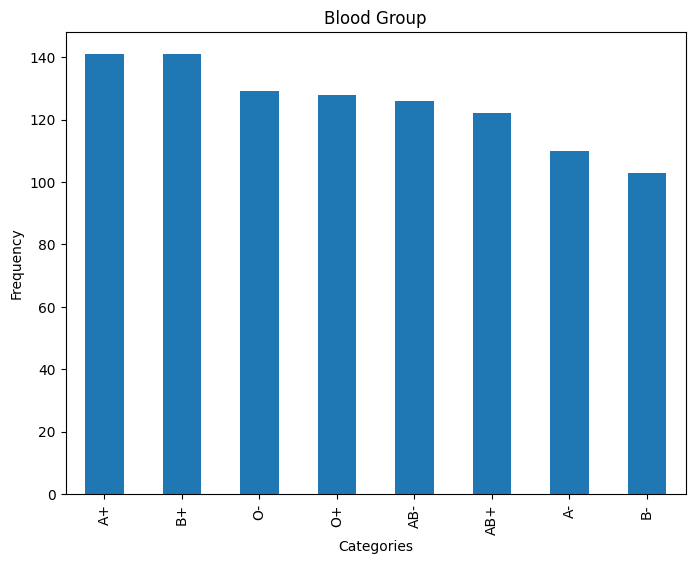

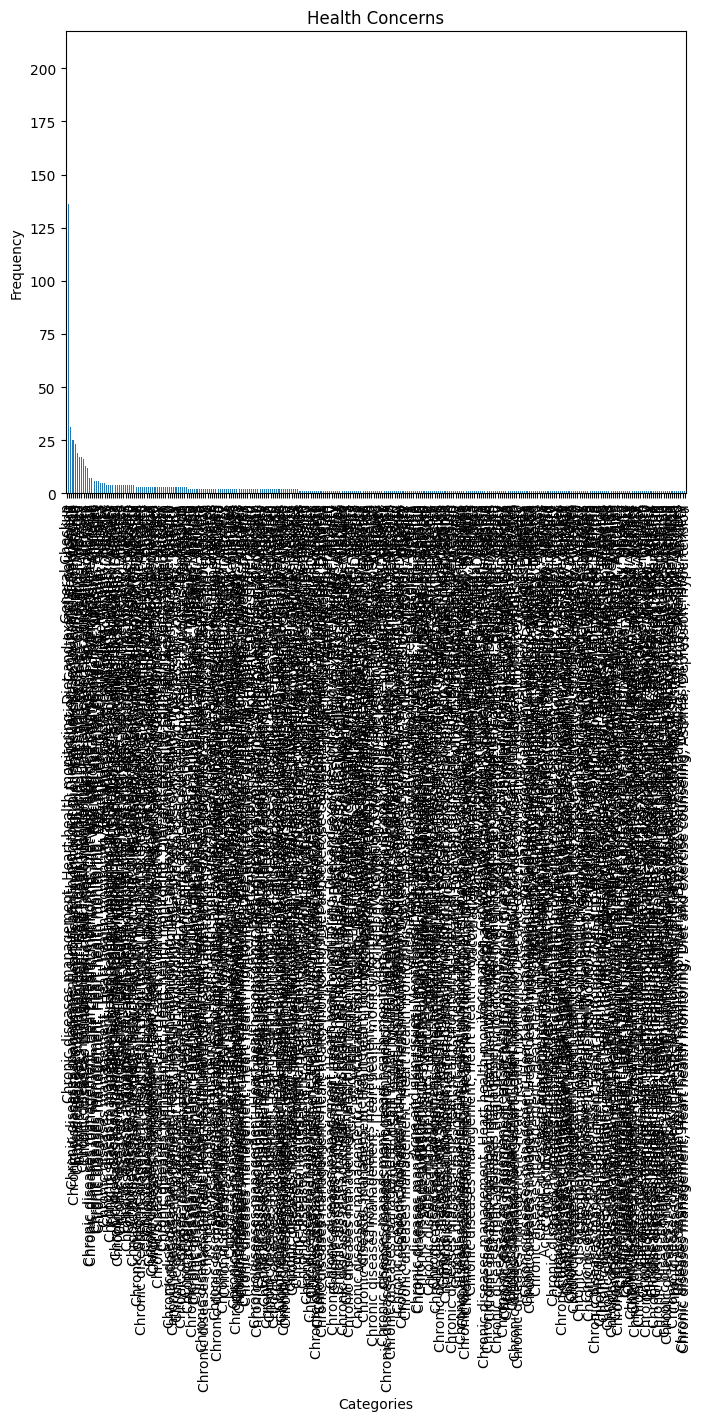

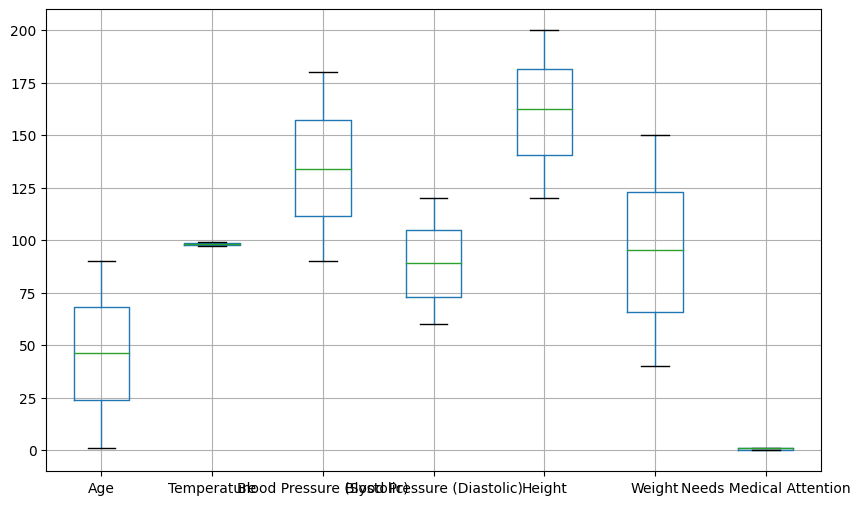

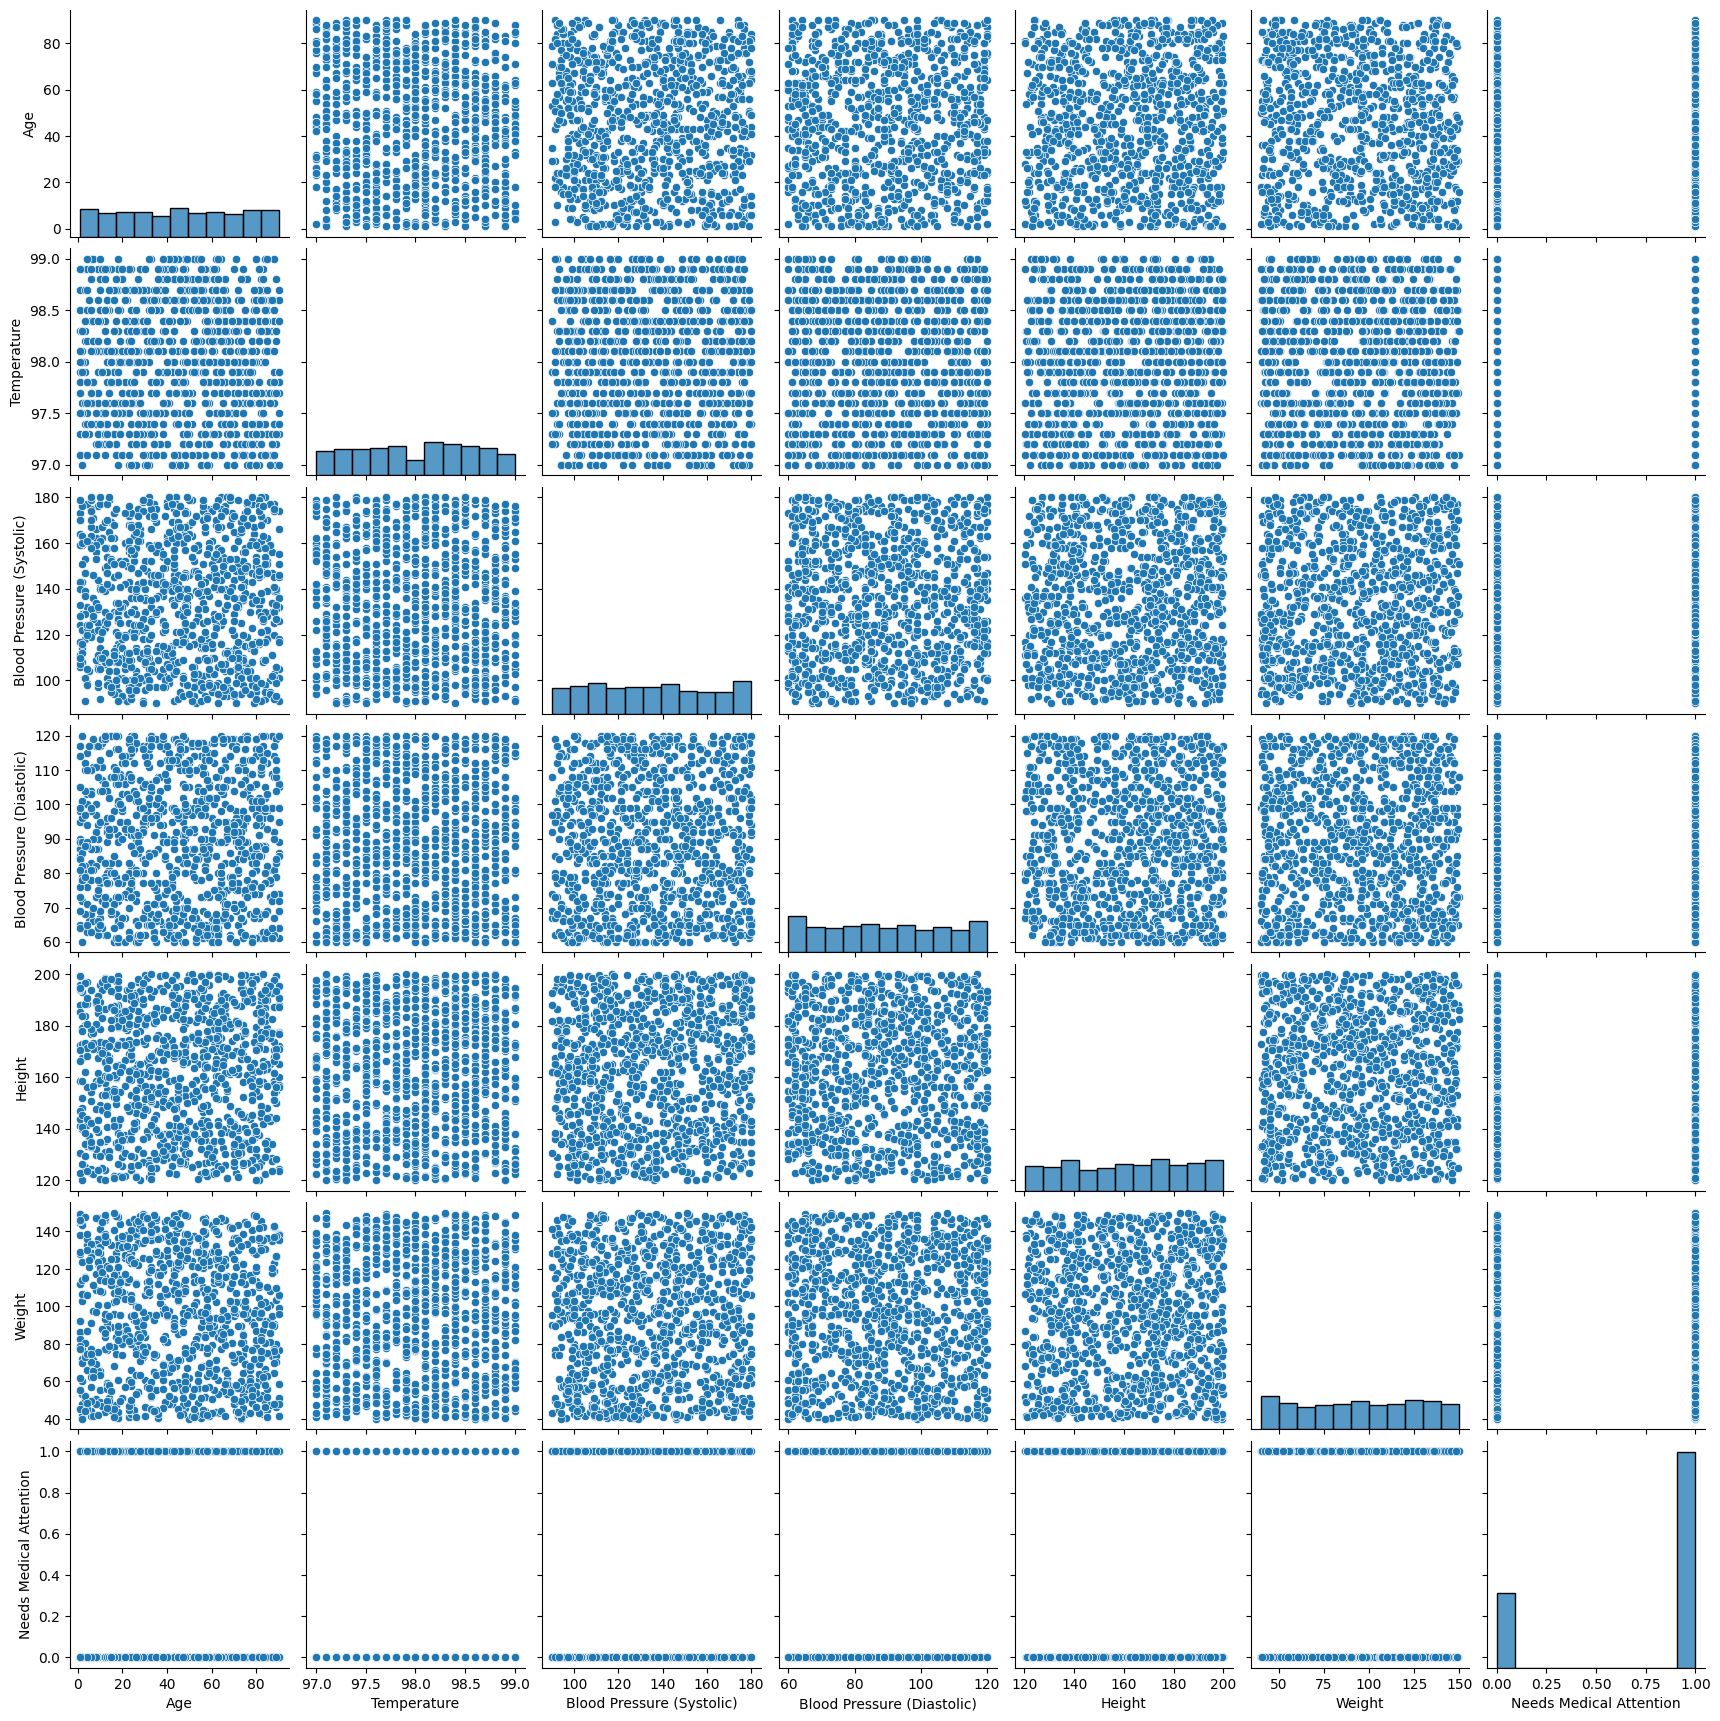

<ipython-input-26-6c5d4b929b0f>:29: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


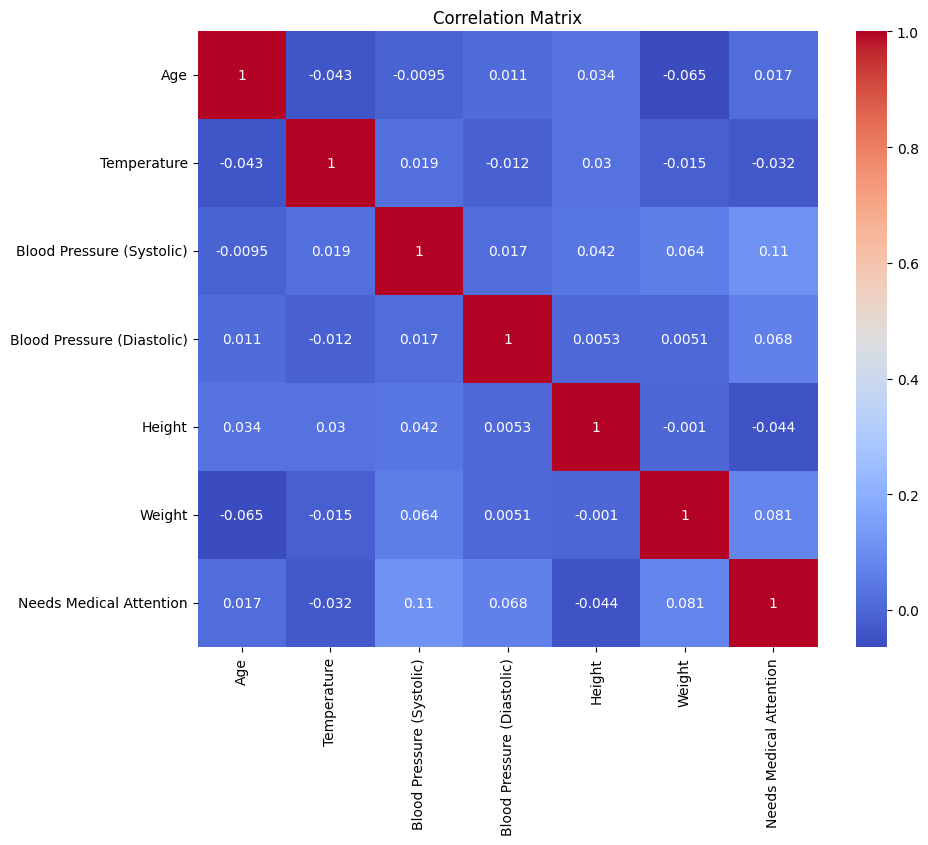

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initial Visualization
# Histograms for numerical variables
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title(col)
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.show()

# Box plots for numerical variables
df.boxplot(figsize=(10, 6))
plt.show()

# Exploratory Data Analysis (EDA)
# Scatter plots for pairwise relationships
sns.pairplot(df)
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

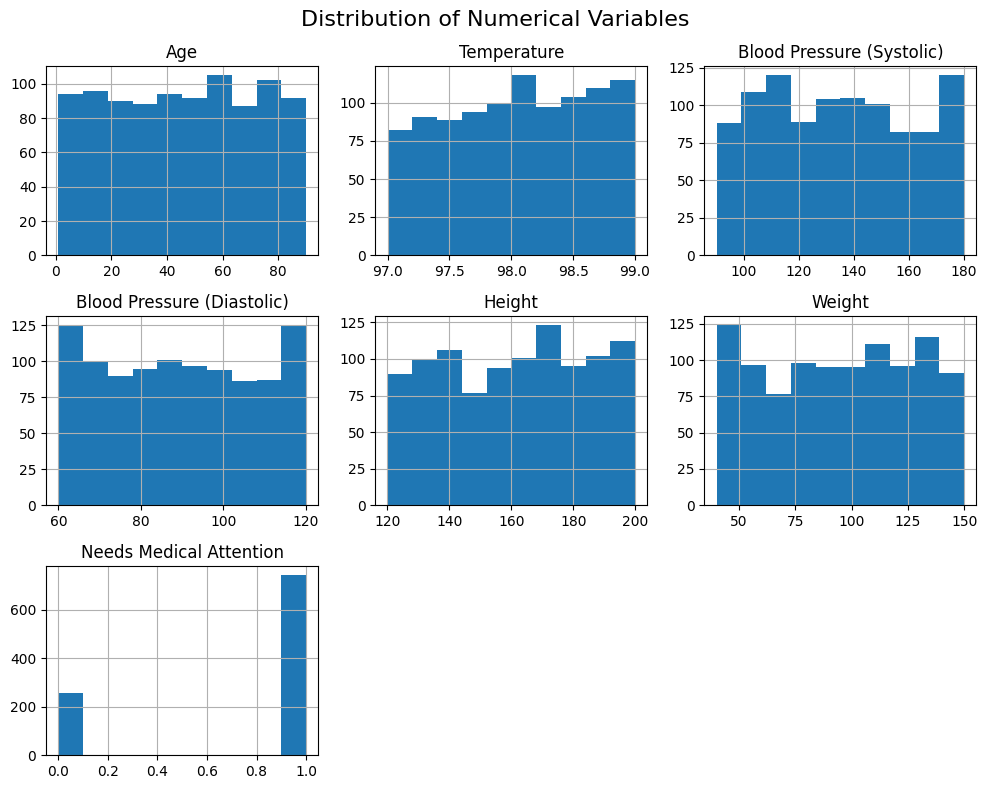

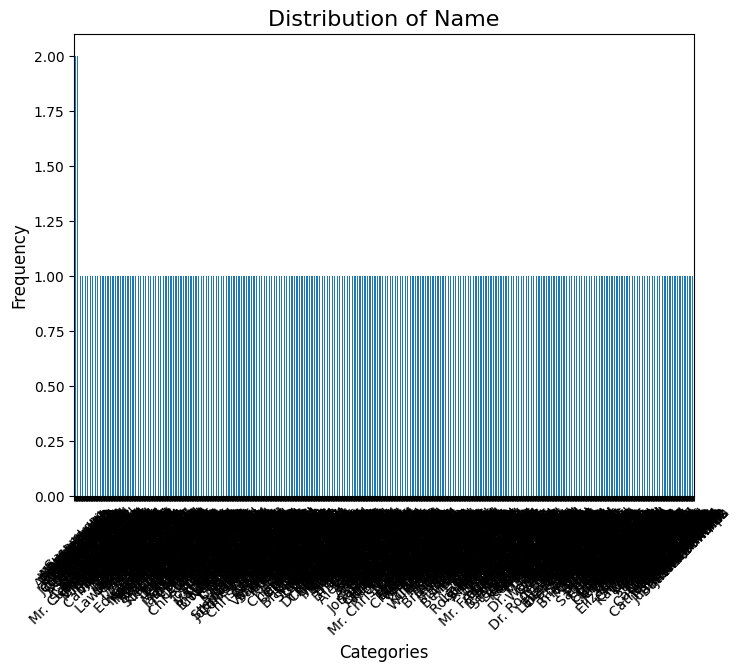

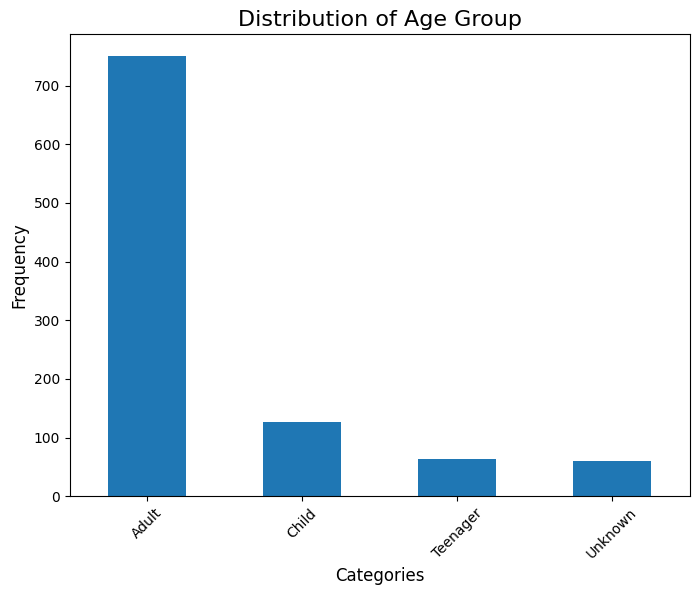

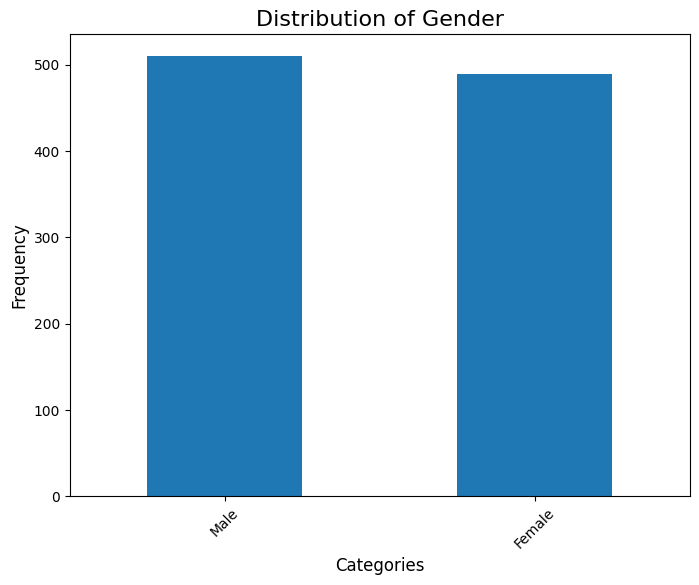

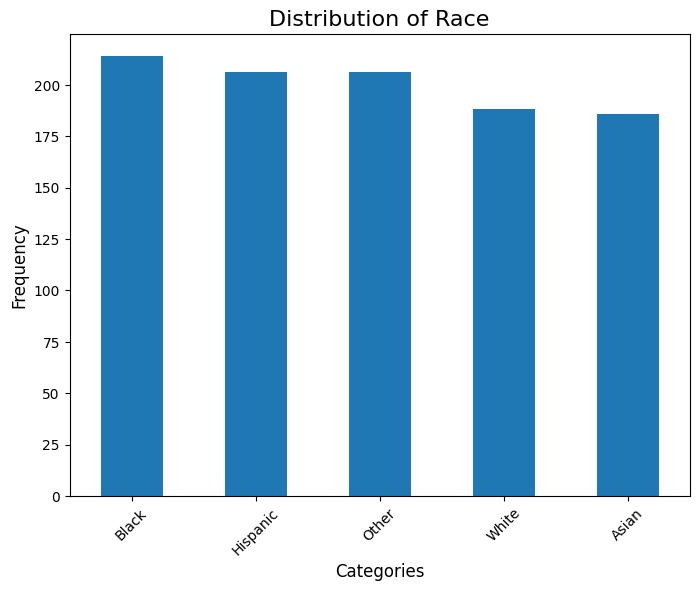

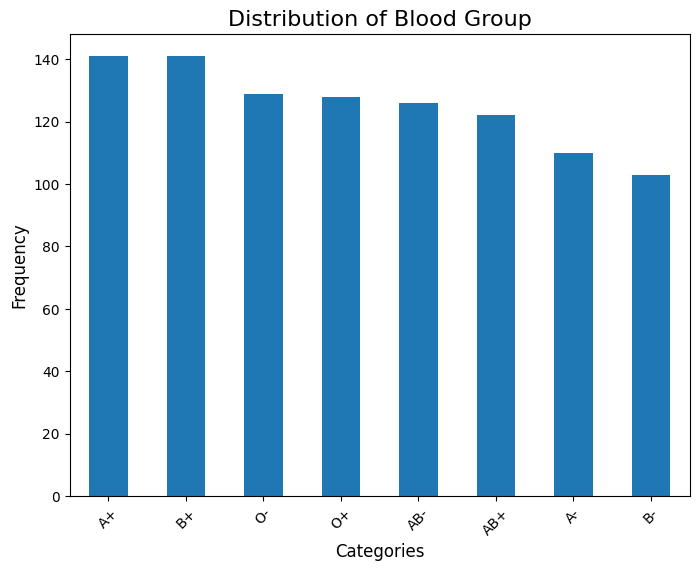

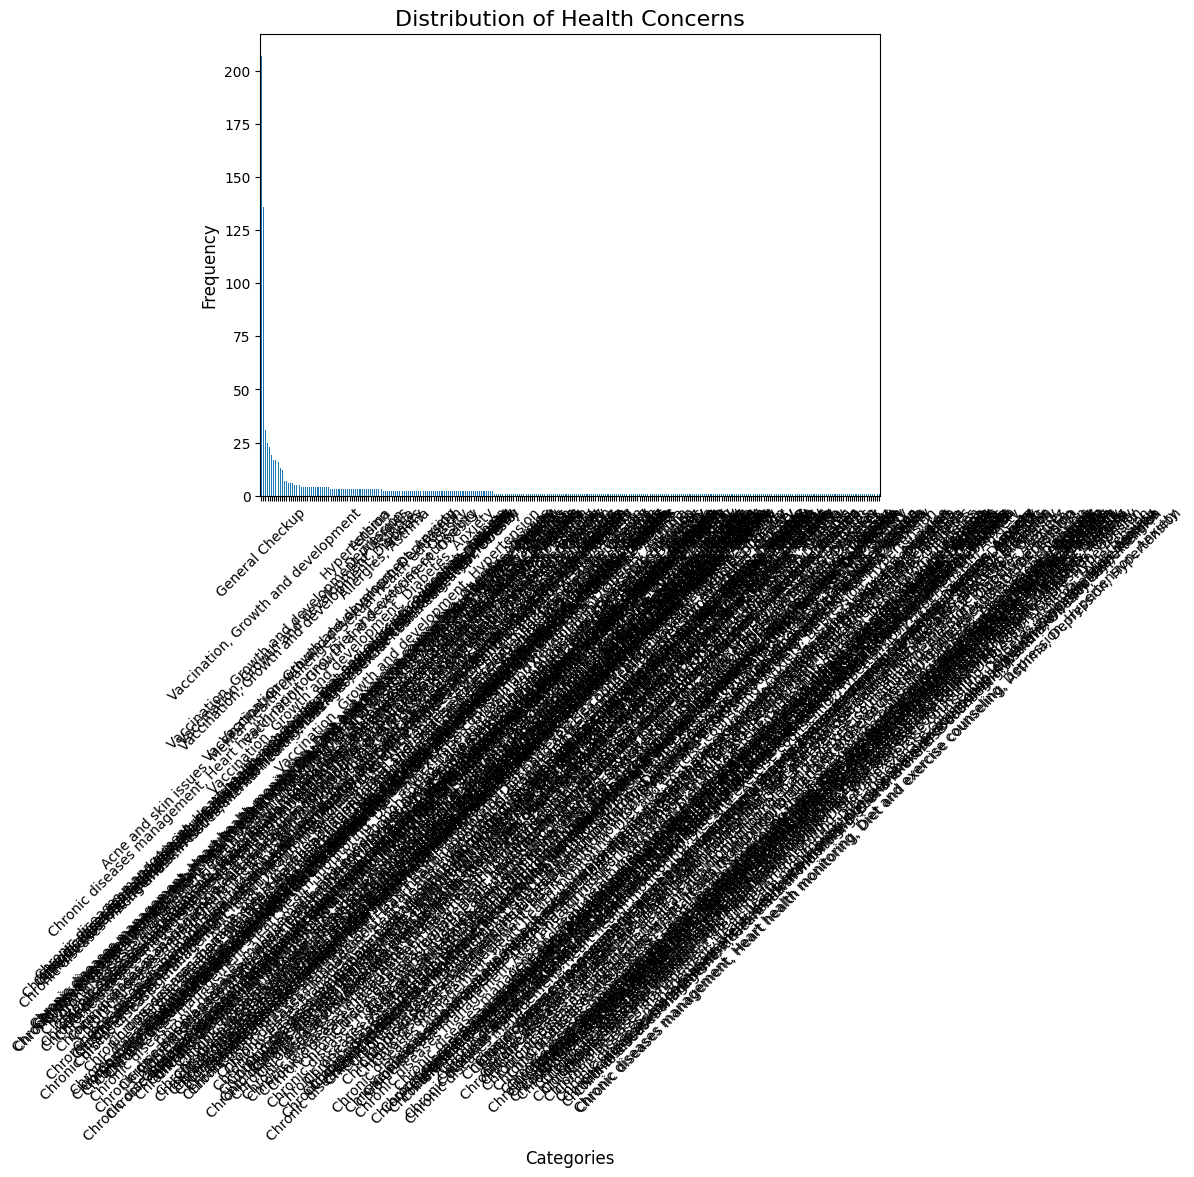

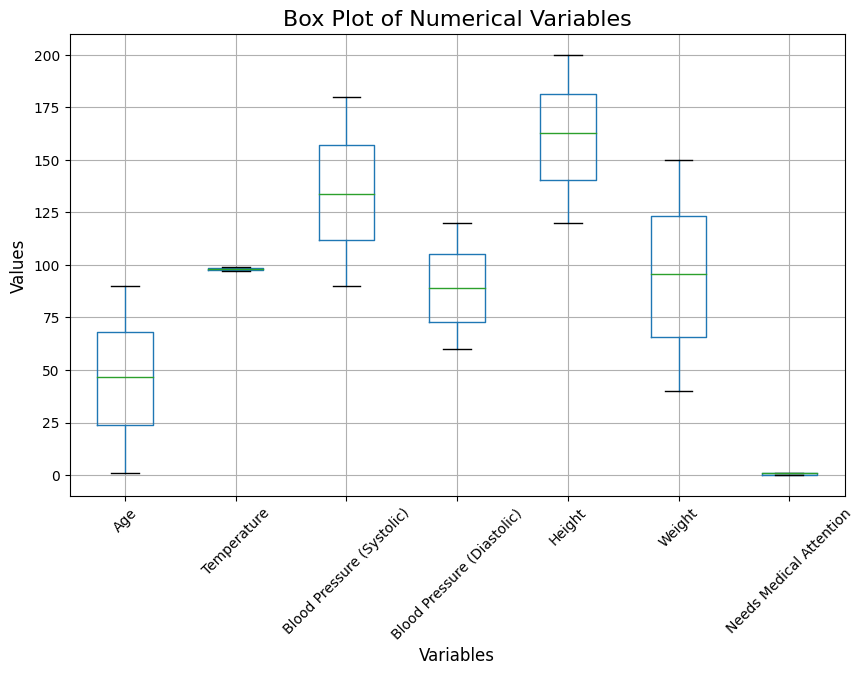

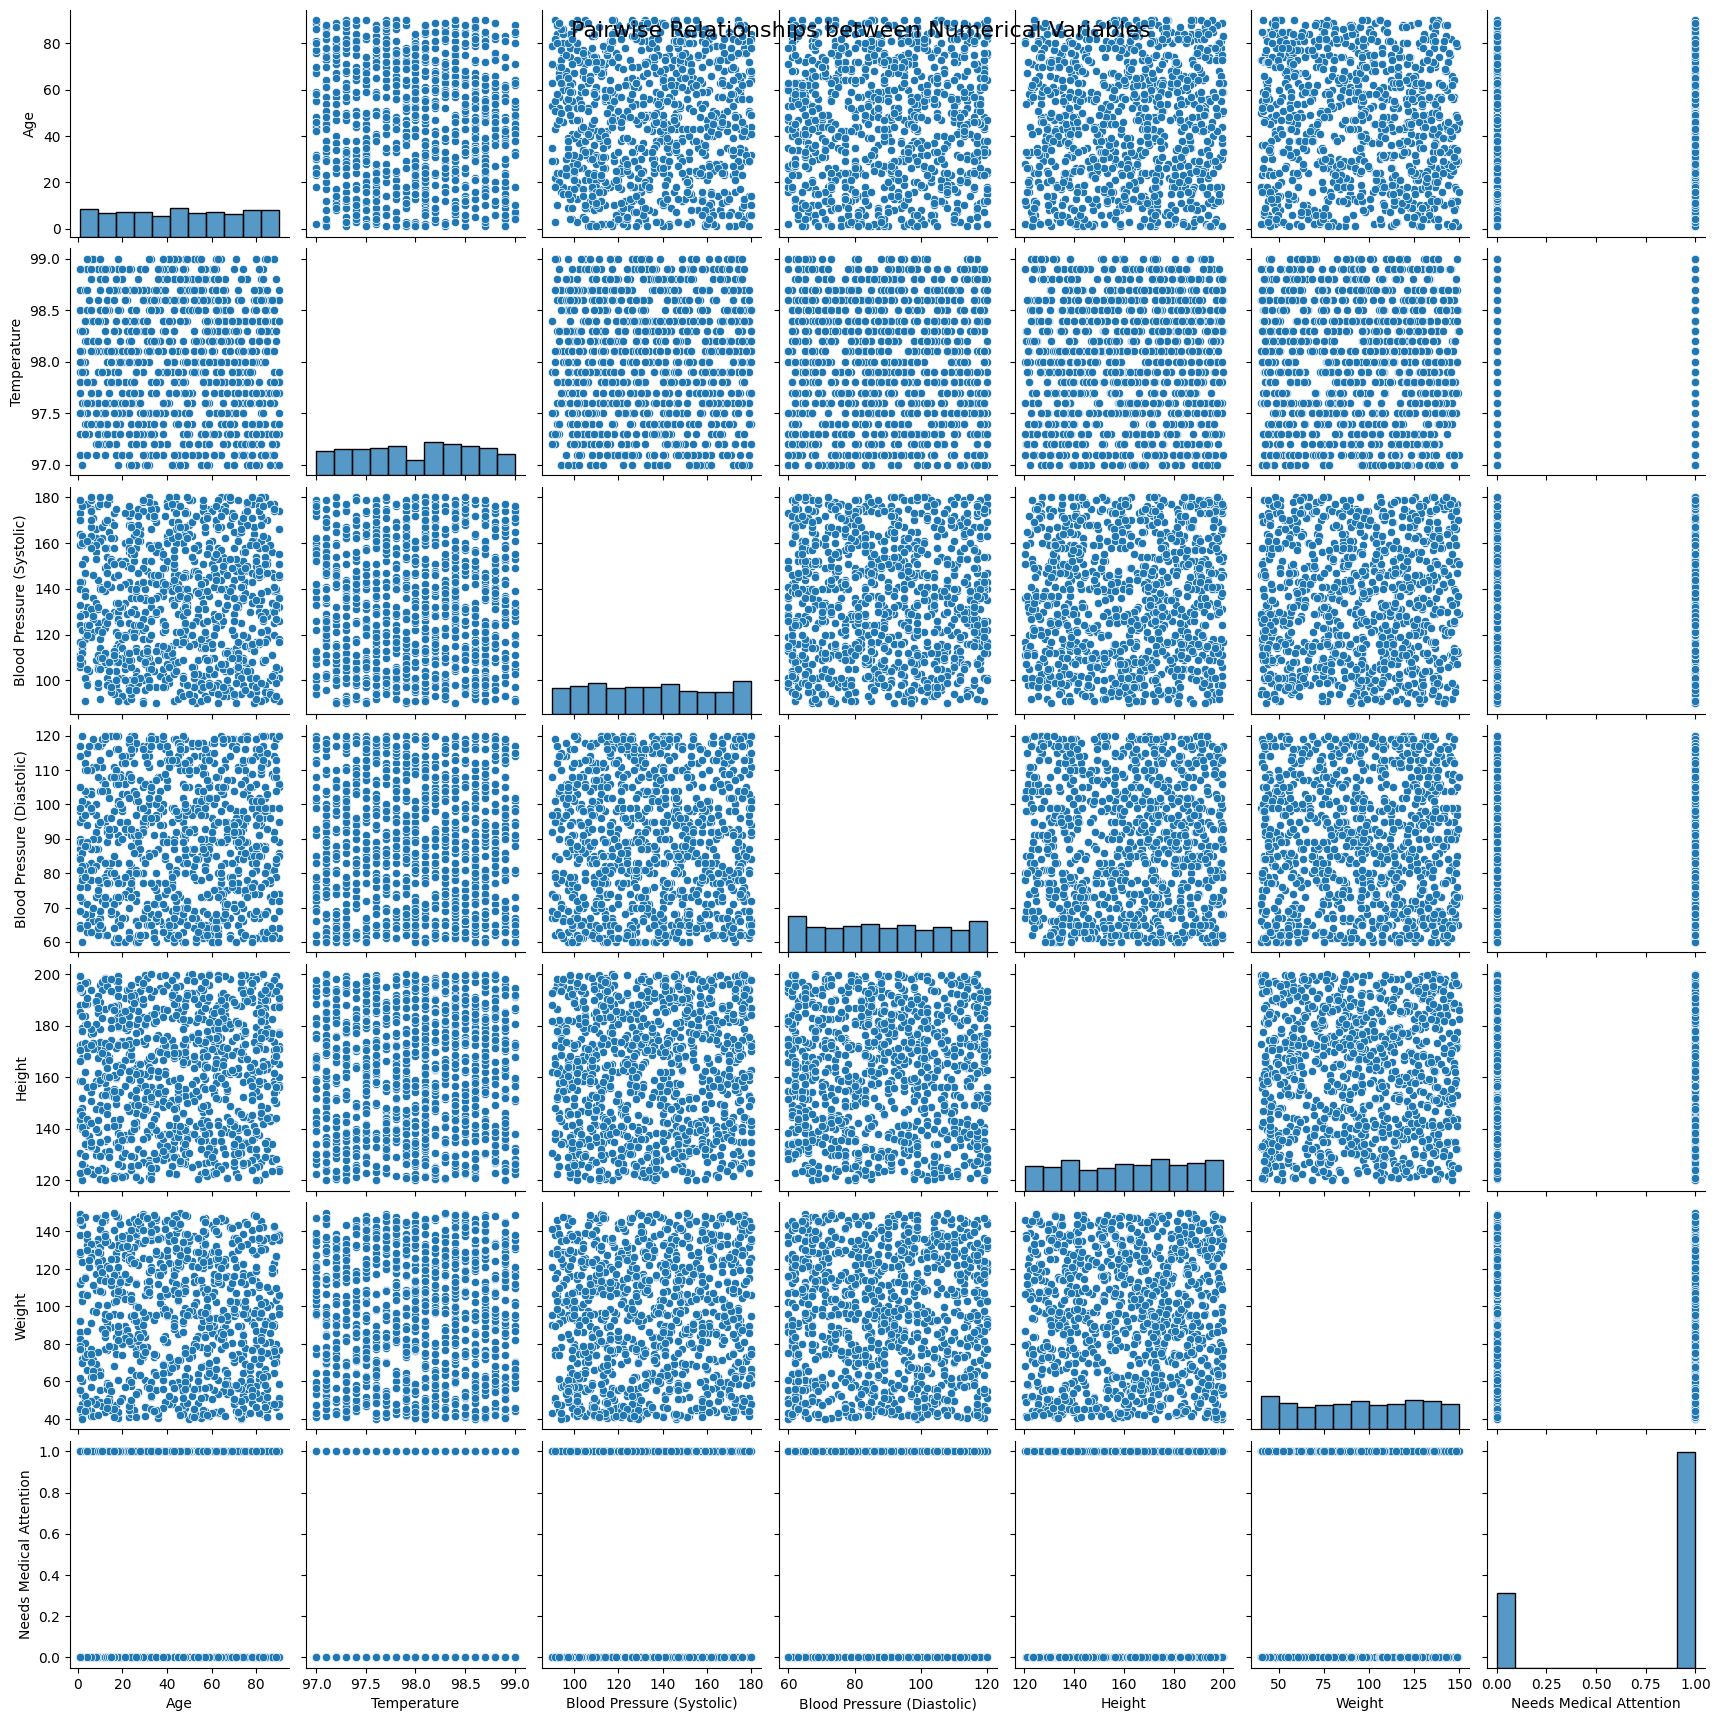

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical variables
df.hist(figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

# Bar plots for categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col].value_counts().plot(kind='bar', figsize=(8, 6))
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel('Categories', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

# Box plots for numerical variables
df.boxplot(figsize=(10, 6))
plt.title('Box Plot of Numerical Variables', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# Scatter plots for pairwise relationships
sns.pairplot(df)
plt.suptitle('Pairwise Relationships between Numerical Variables', fontsize=16)
plt.show()


In [31]:
import pandas as pd

# Selecting numerical columns for skewness calculation
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Calculating skewness for each numerical column
skewness = numerical_columns.skew()

# Displaying skewness for each column
print("Skewness for numerical columns:")
print(skewness)

Skewness for numerical columns:
Age                          -0.029920
Temperature                  -0.060163
Blood Pressure (Systolic)     0.092493
Blood Pressure (Diastolic)    0.054590
Height                       -0.068798
Weight                       -0.048330
Needs Medical Attention      -1.113852
dtype: float64


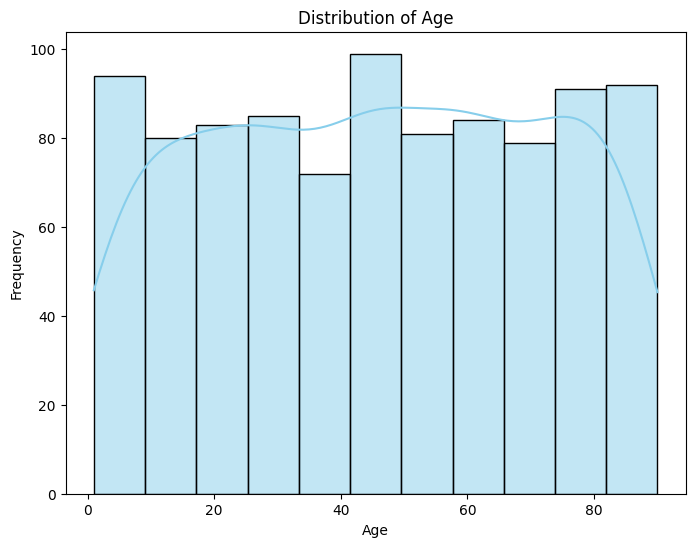

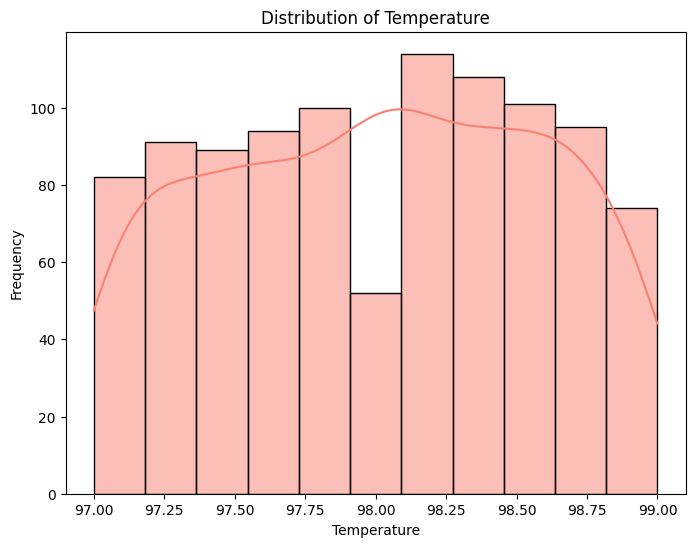

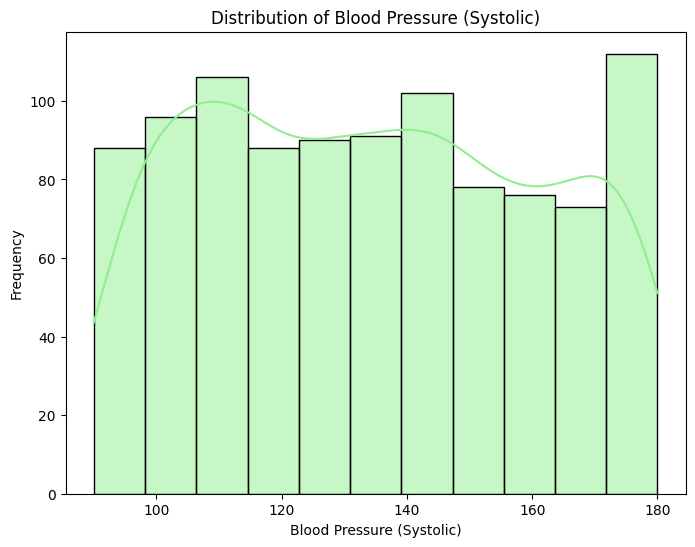

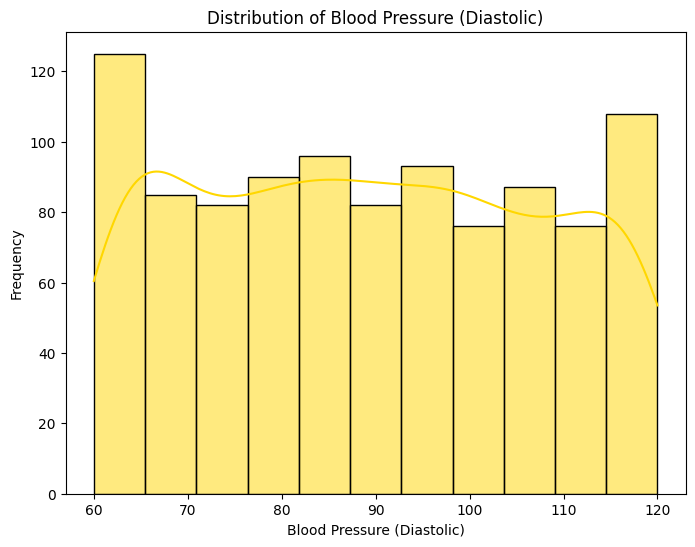

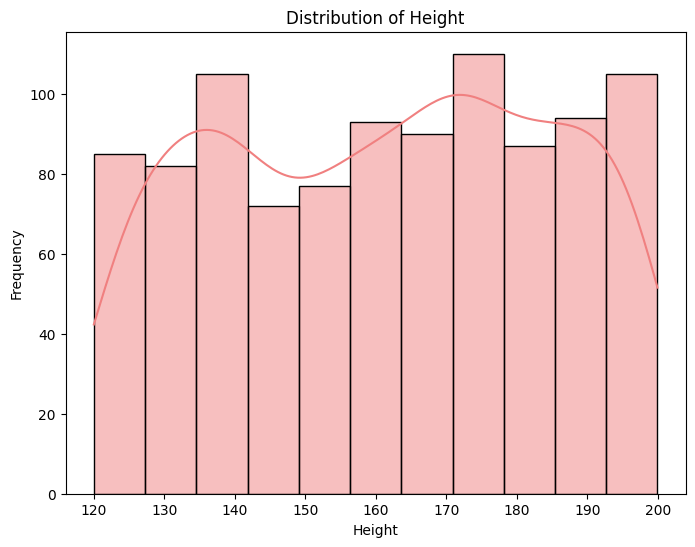

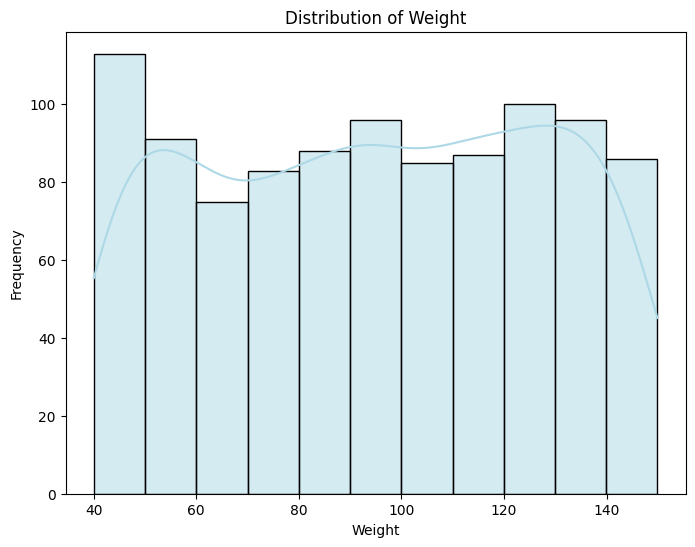

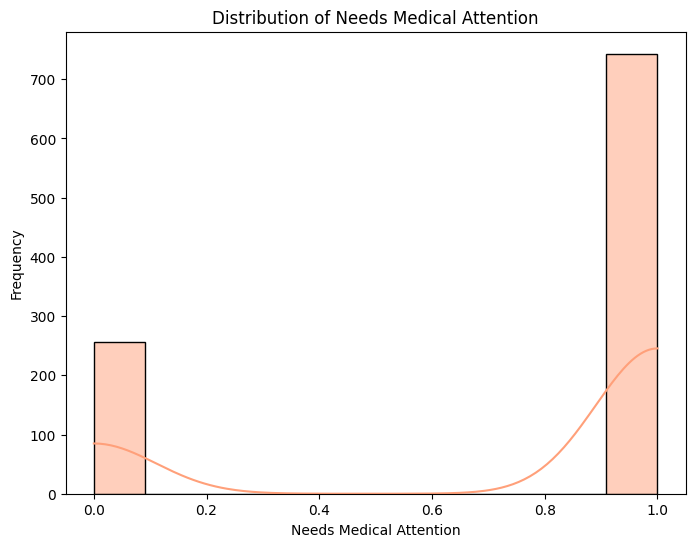

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_columns = ['Age', 'Temperature', 'Blood Pressure (Systolic)', 'Blood Pressure (Diastolic)', 'Height', 'Weight', 'Needs Medical Attention']

# Define bright colors
bright_colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightblue', 'lightsalmon']

# Plot histograms for numerical columns with bright colors
for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True, color=bright_colors[i])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


In [33]:
# Select rows where Age column has NaN values
missing_age_rows = df[df['Age'].isnull()]

# Display rows with missing Age values
print("Rows with missing Age values:")
print(missing_age_rows)


Rows with missing Age values:
                   Name  Age Age Group  Gender      Race Blood Group  \
62          Julie Davis  NaN   Unknown  Female     Black          A-   
78       Patrick Dorsey  NaN   Unknown    Male     White         AB-   
94      Jennifer Watson  NaN   Unknown    Male     Other         AB+   
110        Krista Jones  NaN   Unknown    Male     Black          O+   
133         Chad Rivera  NaN   Unknown    Male     Asian          O-   
148       David Mack MD  NaN   Unknown    Male     Other         AB+   
151  Christopher Harvey  NaN   Unknown    Male     Black          O+   
152     Justin Williams  NaN   Unknown    Male     White          A-   
176     Brittany Butler  NaN   Unknown    Male     Other          A-   
192      Angela Oconnor  NaN   Unknown    Male     Asian          O-   
209      Thomas Sweeney  NaN   Unknown    Male     Other         AB-   
220     Whitney Gilmore  NaN   Unknown    Male     Asian          A+   
221        Sharon Smith  NaN   Unk

In [34]:
# Import necessary libraries
import pandas as pd

# Calculate the mean of the Age column
age_mean = df['Age'].mean()

# Impute missing values in the Age column with the mean
df['Age'].fillna(age_mean, inplace=True)

In [35]:
# Displaying only the 'Age' column
print(df['Age'])

0      29.0
1      84.0
2      26.0
3      42.0
4      24.0
       ... 
995    36.0
996    15.0
997    21.0
998    89.0
999     1.0
Name: Age, Length: 1000, dtype: float64


In [36]:
# Define a dictionary mapping age ranges to numeric categories
age_category_dict_numeric = {
    (0, 25): 0,
    (26, 40): 1,
    (41, 60): 2,
    (61, 100): 3
}

# Function to map age to numeric category using the dictionary
def categorize_age_numeric(age):
    for age_range, category in age_category_dict_numeric.items():
        if age_range[0] <= age <= age_range[1]:
            return category
    return -1  # Handle unknown values

# Apply the function to create a new column 'Numeric Age Group'
df['Numeric Age Group'] = df['Age'].apply(categorize_age_numeric)


In [37]:
df

Name   Age Age Group  Gender      Race Blood Group  \
0            Kevin Wong  29.0     Adult  Female     Black         AB+   
1      Mr. David Meyers  84.0     Adult    Male     White          A-   
2    Robert Sanchez DDS  26.0     Adult    Male  Hispanic          A+   
3           Brent Moore  42.0     Adult    Male     Black          B+   
4        Alicia Kennedy  24.0     Adult    Male     Black          A+   
..                  ...   ...       ...     ...       ...         ...   
995      Stacy Gallegos  36.0     Adult  Female     Black          A+   
996      Natalie Curtis  15.0  Teenager  Female     Asian         AB+   
997        Taylor Meyer  21.0     Adult    Male  Hispanic          A+   
998        Erin Morales  89.0     Adult    Male  Hispanic          A+   
999         Gary Harper   1.0     Child    Male     Asian          B+   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  Chronic diseases management, Heart health moni...   
1    170.96   92.36  Chronic diseases management, Heart health moni...   
2    146.33   77.41  Chronic diseases management, Heart health moni...   
3    197.98  113.40  Chronic diseases management, Heart health moni...   
4    149.24   79.90  Chronic diseases management, Heart health moni...   
..      ...     ...                                                ...   
995  162.34  136.16  Chronic diseases management, Heart health moni...   
996  182.38   55.07  Acne and skin issues, Mental health challenges...   
997  185.71  117.14                                    General Checkup   
998  144.21  109.79                                    General Checkup   
999  194.56   77.49                                    General Checkup   

     Needs Medical Attention  Numeric Age Group  
0                          1                  1  
1                          1                  3  
2                          1                  1  
3                          1                  2  
4                          1                  0  
..                       ...                ...  
995                        1                  1  
996                        0                  0  
997                        0                  0  
998                        0                  3  
999                        0                  0  

[1000 rows x 14 columns]

In [38]:
# Create a dictionary to map gender categories to numeric values
gender_mapping = {'Male': 0, 'Female': 1}

# Map the 'Gender' column using the dictionary
df['Gender'] = df['Gender'].map(gender_mapping)
df

Name   Age Age Group  Gender      Race Blood Group  \
0            Kevin Wong  29.0     Adult       1     Black         AB+   
1      Mr. David Meyers  84.0     Adult       0     White          A-   
2    Robert Sanchez DDS  26.0     Adult       0  Hispanic          A+   
3           Brent Moore  42.0     Adult       0     Black          B+   
4        Alicia Kennedy  24.0     Adult       0     Black          A+   
..                  ...   ...       ...     ...       ...         ...   
995      Stacy Gallegos  36.0     Adult       1     Black          A+   
996      Natalie Curtis  15.0  Teenager       1     Asian         AB+   
997        Taylor Meyer  21.0     Adult       0  Hispanic          A+   
998        Erin Morales  89.0     Adult       0  Hispanic          A+   
999         Gary Harper   1.0     Child       0     Asian          B+   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  Chronic diseases management, Heart health moni...   
1    170.96   92.36  Chronic diseases management, Heart health moni...   
2    146.33   77.41  Chronic diseases management, Heart health moni...   
3    197.98  113.40  Chronic diseases management, Heart health moni...   
4    149.24   79.90  Chronic diseases management, Heart health moni...   
..      ...     ...                                                ...   
995  162.34  136.16  Chronic diseases management, Heart health moni...   
996  182.38   55.07  Acne and skin issues, Mental health challenges...   
997  185.71  117.14                                    General Checkup   
998  144.21  109.79                                    General Checkup   
999  194.56   77.49                                    General Checkup   

     Needs Medical Attention  Numeric Age Group  
0                          1                  1  
1                          1                  3  
2                          1                  1  
3                          1                  2  
4                          1                  0  
..                       ...                ...  
995                        1                  1  
996                        0                  0  
997                        0                  0  
998                        0                  3  
999                        0                  0  

[1000 rows x 14 columns]

In [39]:
# Get unique values in the 'Race' column
unique_races = df['Race'].unique()
print(unique_races)


['Black' 'White' 'Hispanic' 'Asian' 'Other']


In [40]:
# Define a dictionary to map race values to numerical categories
race_mapping = {'Black': 0, 'Hispanic': 1, 'Asian': 2, 'Other': 3, 'White': 4}

# Map the 'Race' column using the defined dictionary
df['Race'] = df['Race'].map(race_mapping)

# Display the updated DataFrame
print(df.head())


                 Name   Age Age Group  Gender  Race Blood Group  Temperature  \
0          Kevin Wong  29.0     Adult       1     0         AB+         97.9   
1    Mr. David Meyers  84.0     Adult       0     4          A-         98.1   
2  Robert Sanchez DDS  26.0     Adult       0     1          A+         97.9   
3         Brent Moore  42.0     Adult       0     0          B+         98.1   
4      Alicia Kennedy  24.0     Adult       0     0          A+         98.0   

   Blood Pressure (Systolic)  Blood Pressure (Diastolic)  Height  Weight  \
0                        178                          84  183.19   73.15   
1                        130                          88  170.96   92.36   
2                        121                         101  146.33   77.41   
3                        169                         112  197.98  113.40   
4                        100                          61  149.24   79.90   

                                     Health Concerns  Needs Me

In [41]:
# Find unique values in the 'Blood Group' column
unique_blood_groups = df['Blood Group'].unique()

# Display the unique values
print(unique_blood_groups)


['AB+' 'A-' 'A+' 'B+' 'B-' 'AB-' 'O+' 'O-']


In [42]:
# Define the mapping dictionary for blood group
blood_group_mapping = {'AB-': 0, 'A-': 1, 'O+': 2, 'B+': 3, 'A+': 4, 'O-': 5, 'AB+': 6, 'B-': 7}

# Map the values in the "Blood Group" column to numeric values
df['Blood Group'] = df['Blood Group'].map(blood_group_mapping)
df

Name   Age Age Group  Gender  Race  Blood Group  \
0            Kevin Wong  29.0     Adult       1     0            6   
1      Mr. David Meyers  84.0     Adult       0     4            1   
2    Robert Sanchez DDS  26.0     Adult       0     1            4   
3           Brent Moore  42.0     Adult       0     0            3   
4        Alicia Kennedy  24.0     Adult       0     0            4   
..                  ...   ...       ...     ...   ...          ...   
995      Stacy Gallegos  36.0     Adult       1     0            4   
996      Natalie Curtis  15.0  Teenager       1     2            6   
997        Taylor Meyer  21.0     Adult       0     1            4   
998        Erin Morales  89.0     Adult       0     1            4   
999         Gary Harper   1.0     Child       0     2            3   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  Chronic diseases management, Heart health moni...   
1    170.96   92.36  Chronic diseases management, Heart health moni...   
2    146.33   77.41  Chronic diseases management, Heart health moni...   
3    197.98  113.40  Chronic diseases management, Heart health moni...   
4    149.24   79.90  Chronic diseases management, Heart health moni...   
..      ...     ...                                                ...   
995  162.34  136.16  Chronic diseases management, Heart health moni...   
996  182.38   55.07  Acne and skin issues, Mental health challenges...   
997  185.71  117.14                                    General Checkup   
998  144.21  109.79                                    General Checkup   
999  194.56   77.49                                    General Checkup   

     Needs Medical Attention  Numeric Age Group  
0                          1                  1  
1                          1                  3  
2                          1                  1  
3                          1                  2  
4                          1                  0  
..                       ...                ...  
995                        1                  1  
996                        0                  0  
997                        0                  0  
998                        0                  3  
999                        0                  0  

[1000 rows x 14 columns]

In [43]:
import pandas as pd

# Fill blank rows with 'Unknown'
df['Health Concerns'].fillna('Unknown', inplace=True)

# Convert the 'Health Concerns' column to a list of health concerns
df['Health Concerns'] = df['Health Concerns'].str.split(',')

# Display the first few rows to verify the conversion
print(df.head())

df

                 Name   Age Age Group  Gender  Race  Blood Group  Temperature  \
0          Kevin Wong  29.0     Adult       1     0            6         97.9   
1    Mr. David Meyers  84.0     Adult       0     4            1         98.1   
2  Robert Sanchez DDS  26.0     Adult       0     1            4         97.9   
3         Brent Moore  42.0     Adult       0     0            3         98.1   
4      Alicia Kennedy  24.0     Adult       0     0            4         98.0   

   Blood Pressure (Systolic)  Blood Pressure (Diastolic)  Height  Weight  \
0                        178                          84  183.19   73.15   
1                        130                          88  170.96   92.36   
2                        121                         101  146.33   77.41   
3                        169                         112  197.98  113.40   
4                        100                          61  149.24   79.90   

                                     Health Concerns  Ne

Name   Age Age Group  Gender  Race  Blood Group  \
0            Kevin Wong  29.0     Adult       1     0            6   
1      Mr. David Meyers  84.0     Adult       0     4            1   
2    Robert Sanchez DDS  26.0     Adult       0     1            4   
3           Brent Moore  42.0     Adult       0     0            3   
4        Alicia Kennedy  24.0     Adult       0     0            4   
..                  ...   ...       ...     ...   ...          ...   
995      Stacy Gallegos  36.0     Adult       1     0            4   
996      Natalie Curtis  15.0  Teenager       1     2            6   
997        Taylor Meyer  21.0     Adult       0     1            4   
998        Erin Morales  89.0     Adult       0     1            4   
999         Gary Harper   1.0     Child       0     2            3   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  [Chronic diseases management,  Heart health mo...   
1    170.96   92.36  [Chronic diseases management,  Heart health mo...   
2    146.33   77.41  [Chronic diseases management,  Heart health mo...   
3    197.98  113.40  [Chronic diseases management,  Heart health mo...   
4    149.24   79.90  [Chronic diseases management,  Heart health mo...   
..      ...     ...                                                ...   
995  162.34  136.16  [Chronic diseases management,  Heart health mo...   
996  182.38   55.07  [Acne and skin issues,  Mental health challeng...   
997  185.71  117.14                                  [General Checkup]   
998  144.21  109.79                                  [General Checkup]   
999  194.56   77.49                                  [General Checkup]   

     Needs Medical Attention  Numeric Age Group  
0                          1                  1  
1                          1                  3  
2                          1                  1  
3                          1                  2  
4                          1                  0  
..                       ...                ...  
995                        1                  1  
996                        0                  0  
997                        0                  0  
998                        0                  3  
999                        0                  0  

[1000 rows x 14 columns]

In [44]:
df['Health Concerns']

0      [Chronic diseases management,  Heart health mo...
1      [Chronic diseases management,  Heart health mo...
2      [Chronic diseases management,  Heart health mo...
3      [Chronic diseases management,  Heart health mo...
4      [Chronic diseases management,  Heart health mo...
                             ...                        
995    [Chronic diseases management,  Heart health mo...
996    [Acne and skin issues,  Mental health challeng...
997                                    [General Checkup]
998                                    [General Checkup]
999                                    [General Checkup]
Name: Health Concerns, Length: 1000, dtype: object

In [45]:
import pandas as pd
# Fill blank cells with "Unknown"
df['Health Concerns'].fillna('Unknown', inplace=True)

# Split rows with multiple health conditions by commas and create a new column
df['Health Concern'] = df['Health Concerns'].str.split(',')

# Iterate over each row in the original DataFrame and handle missing values
new_rows = []

for index, row in df.iterrows():
    health_concerns = row['Health Concern']
    if isinstance(health_concerns, list):
        for health_condition in health_concerns:
            new_row = row.copy()
            new_row['Health Concern'] = health_condition.strip() if isinstance(health_condition, str) else 'Unknown'
            new_rows.append(new_row)
    else:
        # If there's no multiple health condition, keep the row with 'Health Concern' as is
        new_row = row.copy()
        new_row['Health Concern'] = health_concerns.strip() if isinstance(health_concerns, str) else 'Unknown'
        new_rows.append(new_row)

# Create a new DataFrame from the list of duplicated rows
new_df = pd.DataFrame(new_rows)

# Counting the number of health concerns in each row
new_df['Number of Health Concerns'] = new_df['Health Concerns'].apply(len)

# Exploring unique health concerns
unique_health_concerns = set()
for health_concerns in new_df['Health Concerns']:
    unique_health_concerns.update(health_concerns)

# Print unique health concerns
print("Unique Health Concerns:", unique_health_concerns)

# Creating a numerical representation using one-hot encoding
for concern in unique_health_concerns:
    new_df[concern] = new_df['Health Concerns'].apply(lambda x: 1 if concern in x else 0)


Unique Health Concerns: {' Depression', ' Heart health monitoring', ' Growth and development', 'Acne and skin issues', ' Obesity', 'General Checkup', 'Unknown', ' Anxiety', 'Chronic diseases management', ' Asthma', 'Hypertension', ' Hypertension', ' Mental health challenges', ' Sexual health education', 'Vaccination', 'Asthma', 'Obesity', ' Diet and exercise counseling', 'Depression', 'Diabetes', ' Diabetes', ' Allergies', 'Allergies', 'Anxiety'}


In [46]:
df

Name   Age Age Group  Gender  Race  Blood Group  \
0            Kevin Wong  29.0     Adult       1     0            6   
1      Mr. David Meyers  84.0     Adult       0     4            1   
2    Robert Sanchez DDS  26.0     Adult       0     1            4   
3           Brent Moore  42.0     Adult       0     0            3   
4        Alicia Kennedy  24.0     Adult       0     0            4   
..                  ...   ...       ...     ...   ...          ...   
995      Stacy Gallegos  36.0     Adult       1     0            4   
996      Natalie Curtis  15.0  Teenager       1     2            6   
997        Taylor Meyer  21.0     Adult       0     1            4   
998        Erin Morales  89.0     Adult       0     1            4   
999         Gary Harper   1.0     Child       0     2            3   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  [Chronic diseases management,  Heart health mo...   
1    170.96   92.36  [Chronic diseases management,  Heart health mo...   
2    146.33   77.41  [Chronic diseases management,  Heart health mo...   
3    197.98  113.40  [Chronic diseases management,  Heart health mo...   
4    149.24   79.90  [Chronic diseases management,  Heart health mo...   
..      ...     ...                                                ...   
995  162.34  136.16  [Chronic diseases management,  Heart health mo...   
996  182.38   55.07  [Acne and skin issues,  Mental health challeng...   
997  185.71  117.14                                  [General Checkup]   
998  144.21  109.79                                  [General Checkup]   
999  194.56   77.49                                  [General Checkup]   

     Needs Medical Attention  Numeric Age Group  Health Concern  
0                          1                  1             NaN  
1                          1                  3             NaN  
2                          1                  1             NaN  
3                          1                  2             NaN  
4                          1                  0             NaN  
..                       ...                ...             ...  
995                        1                  1             NaN  
996                        0                  0             NaN  
997                        0                  0             NaN  
998                        0                  3             NaN  
999                        0                  0             NaN  

[1000 rows x 15 columns]

In [47]:
df

Name   Age Age Group  Gender  Race  Blood Group  \
0            Kevin Wong  29.0     Adult       1     0            6   
1      Mr. David Meyers  84.0     Adult       0     4            1   
2    Robert Sanchez DDS  26.0     Adult       0     1            4   
3           Brent Moore  42.0     Adult       0     0            3   
4        Alicia Kennedy  24.0     Adult       0     0            4   
..                  ...   ...       ...     ...   ...          ...   
995      Stacy Gallegos  36.0     Adult       1     0            4   
996      Natalie Curtis  15.0  Teenager       1     2            6   
997        Taylor Meyer  21.0     Adult       0     1            4   
998        Erin Morales  89.0     Adult       0     1            4   
999         Gary Harper   1.0     Child       0     2            3   

     Temperature  Blood Pressure (Systolic)  Blood Pressure (Diastolic)  \
0           97.9                        178                          84   
1           98.1                        130                          88   
2           97.9                        121                         101   
3           98.1                        169                         112   
4           98.0                        100                          61   
..           ...                        ...                         ...   
995         97.9                        159                          68   
996         98.0                         97                          69   
997         97.6                        119                         112   
998         98.3                         93                          84   
999         98.0                        128                          81   

     Height  Weight                                    Health Concerns  \
0    183.19   73.15  [Chronic diseases management,  Heart health mo...   
1    170.96   92.36  [Chronic diseases management,  Heart health mo...   
2    146.33   77.41  [Chronic diseases management,  Heart health mo...   
3    197.98  113.40  [Chronic diseases management,  Heart health mo...   
4    149.24   79.90  [Chronic diseases management,  Heart health mo...   
..      ...     ...                                                ...   
995  162.34  136.16  [Chronic diseases management,  Heart health mo...   
996  182.38   55.07  [Acne and skin issues,  Mental health challeng...   
997  185.71  117.14                                  [General Checkup]   
998  144.21  109.79                                  [General Checkup]   
999  194.56   77.49                                  [General Checkup]   

     Needs Medical Attention  Numeric Age Group  Health Concern  
0                          1                  1             NaN  
1                          1                  3             NaN  
2                          1                  1             NaN  
3                          1                  2             NaN  
4                          1                  0             NaN  
..                       ...                ...             ...  
995                        1                  1             NaN  
996                        0                  0             NaN  
997                        0                  0             NaN  
998                        0                  3             NaN  
999                        0                  0             NaN  

[1000 rows x 15 columns]

In [48]:
# Counting the number of health concerns in each row
df['Number of Health Concerns'] = df['Health Concerns'].apply(len)

# Exploring unique health concerns
unique_health_concerns = set()
for health_concerns in df['Health Concerns']:
    unique_health_concerns.update(health_concerns)

# Print unique health concerns
print("Unique Health Concerns:", unique_health_concerns)

# Creating a numerical representation using one-hot encoding
for concern in unique_health_concerns:
    df[concern] = df['Health Concerns'].apply(lambda x: 1 if concern in x else 0)


Unique Health Concerns: {' Depression', ' Heart health monitoring', ' Growth and development', 'Acne and skin issues', ' Obesity', 'General Checkup', 'Unknown', ' Anxiety', 'Chronic diseases management', ' Asthma', 'Hypertension', ' Hypertension', ' Mental health challenges', ' Sexual health education', 'Vaccination', 'Asthma', 'Obesity', ' Diet and exercise counseling', 'Depression', 'Diabetes', ' Diabetes', ' Allergies', 'Allergies', 'Anxiety'}


In [49]:
df ['Health Concern']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
995   NaN
996   NaN
997   NaN
998   NaN
999   NaN
Name: Health Concern, Length: 1000, dtype: float64

In [50]:
import pandas as pd
# Drop the 'Health Concern' column
df.drop(columns=['Health Concern'], inplace=True)

In [51]:
column_names = df.columns
print(column_names)

Index(['Name', 'Age', 'Age Group', 'Gender', 'Race', 'Blood Group',
       'Temperature', 'Blood Pressure (Systolic)',
       'Blood Pressure (Diastolic)', 'Height', 'Weight', 'Health Concerns',
       'Needs Medical Attention', 'Numeric Age Group',
       'Number of Health Concerns', ' Depression', ' Heart health monitoring',
       ' Growth and development', 'Acne and skin issues', ' Obesity',
       'General Checkup', 'Unknown', ' Anxiety', 'Chronic diseases management',
       ' Asthma', 'Hypertension', ' Hypertension', ' Mental health challenges',
       ' Sexual health education', 'Vaccination', 'Asthma', 'Obesity',
       ' Diet and exercise counseling', 'Depression', 'Diabetes', ' Diabetes',
       ' Allergies', 'Allergies', 'Anxiety'],
      dtype='object')


In [52]:
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include='number')

# Display the selected numeric columns
print(numeric_df)
numeric_df.corr()

      Age  Gender  Race  Blood Group  Temperature  Blood Pressure (Systolic)  \
0    29.0       1     0            6         97.9                        178   
1    84.0       0     4            1         98.1                        130   
2    26.0       0     1            4         97.9                        121   
3    42.0       0     0            3         98.1                        169   
4    24.0       0     0            4         98.0                        100   
..    ...     ...   ...          ...          ...                        ...   
995  36.0       1     0            4         97.9                        159   
996  15.0       1     2            6         98.0                         97   
997  21.0       0     1            4         97.6                        119   
998  89.0       0     1            4         98.3                         93   
999   1.0       0     2            3         98.0                        128   

     Blood Pressure (Diastolic)  Height

Age    Gender      Race  Blood Group  \
Age                            1.000000e+00  0.021437 -0.015645    -0.042293   
Gender                         2.143728e-02  1.000000  0.018985     0.052414   
Race                          -1.564549e-02  0.018985  1.000000     0.037033   
Blood Group                   -4.229306e-02  0.052414  0.037033     1.000000   
Temperature                   -4.187165e-02 -0.011855 -0.006760     0.021326   
Blood Pressure (Systolic)     -9.177439e-03 -0.048921  0.057787    -0.012643   
Blood Pressure (Diastolic)     1.062430e-02  0.012449 -0.016144    -0.029204   
Height                         3.325761e-02  0.047283 -0.008441     0.028555   
Weight                        -6.301085e-02  0.022803 -0.003821    -0.040494   
Needs Medical Attention        1.622124e-02  0.008835  0.020359    -0.006298   
Numeric Age Group              9.564945e-01  0.014556 -0.010882    -0.054028   
Number of Health Concerns      1.366514e-01  0.012977  0.007749     0.042663   
 Depression                    3.880559e-03  0.033578  0.019373     0.004919   
 Heart health monitoring       4.541202e-01  0.054440 -0.016273     0.018692   
 Growth and development       -5.342369e-01 -0.012844  0.042457    -0.025012   
Acne and skin issues          -2.616739e-01 -0.056995 -0.015157     0.050800   
 Obesity                       7.392585e-02  0.014150 -0.011165    -0.006511   
General Checkup               -1.227239e-02 -0.011998 -0.002148    -0.012661   
Unknown                        1.959636e-17 -0.013392 -0.034610     0.013621   
 Anxiety                      -3.643369e-02  0.030603 -0.003444     0.000919   
Chronic diseases management    4.541202e-01  0.054440 -0.016273     0.018692   
 Asthma                       -1.285699e-02 -0.023955  0.041015     0.033228   
Hypertension                  -1.316623e-18 -0.010317 -0.022261    -0.011686   
 Hypertension                  8.153629e-02  0.005562  0.007411     0.001016   
 Mental health challenges     -2.616739e-01 -0.056995 -0.015157     0.050800   
 Sexual health education      -2.616739e-01 -0.056995 -0.015157     0.050800   
Vaccination                   -5.342369e-01 -0.012844  0.042457    -0.025012   
Asthma                        -4.233181e-17 -0.008684  0.063130    -0.038544   
Obesity                        2.707932e-18  0.015599  0.052505    -0.008037   
 Diet and exercise counseling  4.541202e-01  0.054440 -0.016273     0.018692   
Depression                     2.219259e-17 -0.012762 -0.017369     0.023982   
Diabetes                       3.544219e-17  0.000896 -0.014120    -0.009119   
 Diabetes                      3.286694e-02 -0.005674  0.021251     0.021311   
 Allergies                     3.449431e-02 -0.034372 -0.024915     0.002059   
Allergies                      1.271284e-17 -0.062117  0.002320    -0.020065   
Anxiety                       -5.910761e-17  0.015599 -0.037333    -0.052863   

                               Temperature  Blood Pressure (Systolic)  \
Age                              -0.041872                  -0.009177   
Gender                           -0.011855                  -0.048921   
Race                             -0.006760                   0.057787   
Blood Group                       0.021326                  -0.012643   
Temperature                       1.000000                   0.019296   
Blood Pressure (Systolic)         0.019296                   1.000000   
Blood Pressure (Diastolic)       -0.012202                   0.016760   
Height                            0.029523                   0.042426   
Weight                           -0.015252                   0.063763   
Needs Medical Attention          -0.031977                   0.110760   
Numeric Age Group                -0.036830                   0.013946   
Number of Health Concerns        -0.019376                   0.044720   
 Depression                      -0.031516                  -0.014142   
 Heart health monitoring         -0.019152               

In [53]:
column_names1 = numeric_df.columns
print(column_names1)

Index(['Age', 'Gender', 'Race', 'Blood Group', 'Temperature',
       'Blood Pressure (Systolic)', 'Blood Pressure (Diastolic)', 'Height',
       'Weight', 'Needs Medical Attention', 'Numeric Age Group',
       'Number of Health Concerns', ' Depression', ' Heart health monitoring',
       ' Growth and development', 'Acne and skin issues', ' Obesity',
       'General Checkup', 'Unknown', ' Anxiety', 'Chronic diseases management',
       ' Asthma', 'Hypertension', ' Hypertension', ' Mental health challenges',
       ' Sexual health education', 'Vaccination', 'Asthma', 'Obesity',
       ' Diet and exercise counseling', 'Depression', 'Diabetes', ' Diabetes',
       ' Allergies', 'Allergies', 'Anxiety'],
      dtype='object')


In [87]:
# Separate the input variables (features) from the target variable
X = numeric_df.drop(columns=['Needs Medical Attention'])  # Input variables
y = numeric_df['Needs Medical Attention']  # Target variable

# Display the input variables and target variable
print("Input variables (features):")
print(X)
print("\nTarget variable:")
print(y)

Input variables (features):
      Age  Gender  Race  Blood Group  Temperature  Blood Pressure (Systolic)  \
0    29.0       1     0            6         97.9                        178   
1    84.0       0     4            1         98.1                        130   
2    26.0       0     1            4         97.9                        121   
3    42.0       0     0            3         98.1                        169   
4    24.0       0     0            4         98.0                        100   
..    ...     ...   ...          ...          ...                        ...   
995  36.0       1     0            4         97.9                        159   
996  15.0       1     2            6         98.0                         97   
997  21.0       0     1            4         97.6                        119   
998  89.0       0     1            4         98.3                         93   
999   1.0       0     2            3         98.0                        128   

     Blood 

In [88]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
# Display the shapes of the training and testing sets
print("Training set - X shape:", X_train.shape)
print("Training set - y shape:", y_train.shape)
print("Testing set - X shape:", X_test.shape)
print("Testing set - y shape:", y_test.shape)

Training set - X shape: (800, 35)
Training set - y shape: (800,)
Testing set - X shape: (200, 35)
Testing set - y shape: (200,)


In [90]:
from sklearn.linear_model import LogisticRegression
# Create the model
logistic_regression_model = LogisticRegression(solver='saga', max_iter=500)

# Train the model
logistic_regression_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [91]:
from sklearn.tree import DecisionTreeClassifier

# Create the model
decision_tree_model = DecisionTreeClassifier()

# Train the model
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [92]:
from sklearn.ensemble import RandomForestClassifier

# Create the model
random_forest_model = RandomForestClassifier()

# Train the model
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
from sklearn.neighbors import KNeighborsClassifier

# Create the model
knn_model = KNeighborsClassifier()

# Train the model
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [94]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report

# Define a function to make predictions and evaluate the model
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Return the predictions
    return y_pred

# Evaluate each trained model
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "K-Nearest Neighbors": knn_model
}

for model_name, model in models.items():
    print("Model:", model_name)
    print("Predictions and Evaluation on Testing Data:")
    y_pred = evaluate_model(model, X_test, y_test)
    print("--------------------------------------------\n")

Model: Logistic Regression
Predictions and Evaluation on Testing Data:
Accuracy: 0.95

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.97      0.97      0.97       154

    accuracy                           0.95       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.95      0.95      0.95       200

--------------------------------------------

Model: Decision Tree
Predictions and Evaluation on Testing Data:
Accuracy: 0.955

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        46
           1       0.99      0.95      0.97       154

    accuracy                           0.95       200
   macro avg       0.92      0.96      0.94       200
weighted avg       0.96      0.95      0.96       200

--------------------------------------------

Model: Random Forest
Predictions and Ev

In [95]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define a function to make predictions and evaluate the model
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Display confusion matrix
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Return the predictions
    return y_pred

# Evaluate each trained model
models = {
    "Logistic Regression": logistic_regression_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "K-Nearest Neighbors": knn_model
}

for model_name, model in models.items():
    print("Model:", model_name)
    print("Predictions and Evaluation on Testing Data:")
    y_pred = evaluate_model(model, X_test, y_test)
    print("--------------------------------------------\n")

Model: Logistic Regression
Predictions and Evaluation on Testing Data:
Accuracy: 0.95

Confusion Matrix:
[[ 41   5]
 [  5 149]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        46
           1       0.97      0.97      0.97       154

    accuracy                           0.95       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.95      0.95      0.95       200

--------------------------------------------

Model: Decision Tree
Predictions and Evaluation on Testing Data:
Accuracy: 0.955

Confusion Matrix:
[[ 45   1]
 [  8 146]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91        46
           1       0.99      0.95      0.97       154

    accuracy                           0.95       200
   macro avg       0.92      0.96      0.94       200
weighted avg       0.96      0.95      0.96       200

-

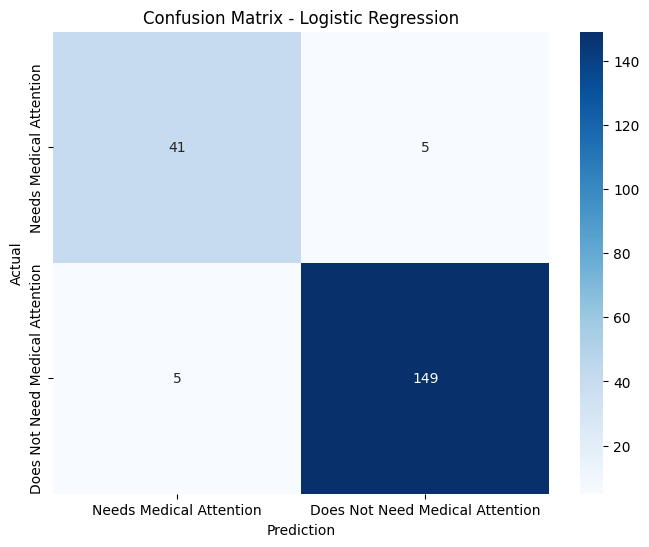

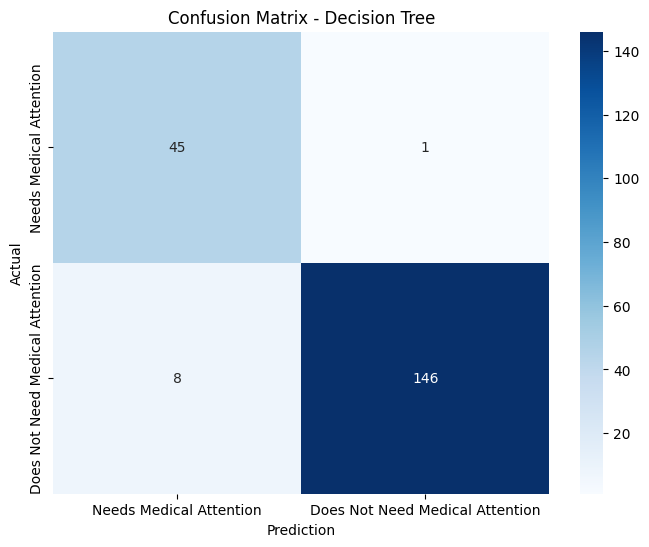

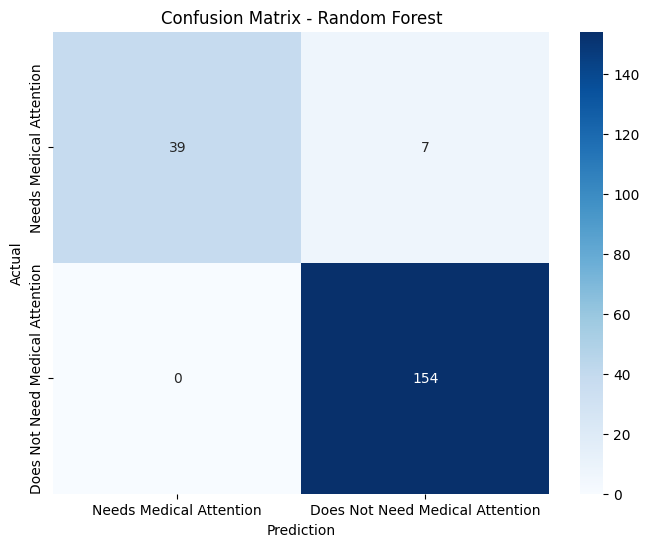

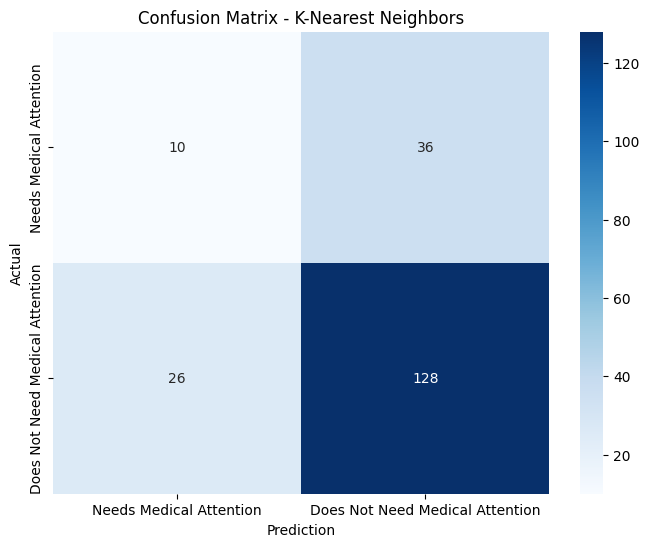

In [97]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix data for each model
confusion_matrices = {
    "Logistic Regression": [[41, 5], [5, 149]],
    "Decision Tree": [[45, 1], [8, 146]],
    "Random Forest": [[39, 7], [0, 154]],
    "K-Nearest Neighbors": [[10, 36], [26, 128]]
}

# Define labels
labels = ['Needs Medical Attention', 'Does Not Need Medical Attention']

# Plot confusion matrix for each model
for model_name, conf_matrix in confusion_matrices.items():
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
